### Importing Libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as gp
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

### Input Diabetes Dataset

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Locate Missing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check for Duplicates

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [7]:
# Get the shape of the dataframe
df.shape

(768, 9)

In [8]:
# Check for NaN values in Name
df.query(''' `Pregnancies`.isna() ''')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Detect Outliers

In [9]:
# Describing the statistics of the dataset column by column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


### Taking a look at the Outcome column

In [11]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [12]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Checking the Age column visually for irregularity

<Axes: >

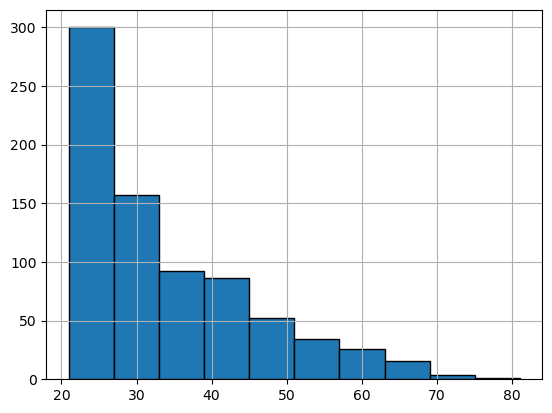

In [13]:
df["Age"].hist(edgecolor = "black")

### Using a histogram plot for all columns against the Outcome column

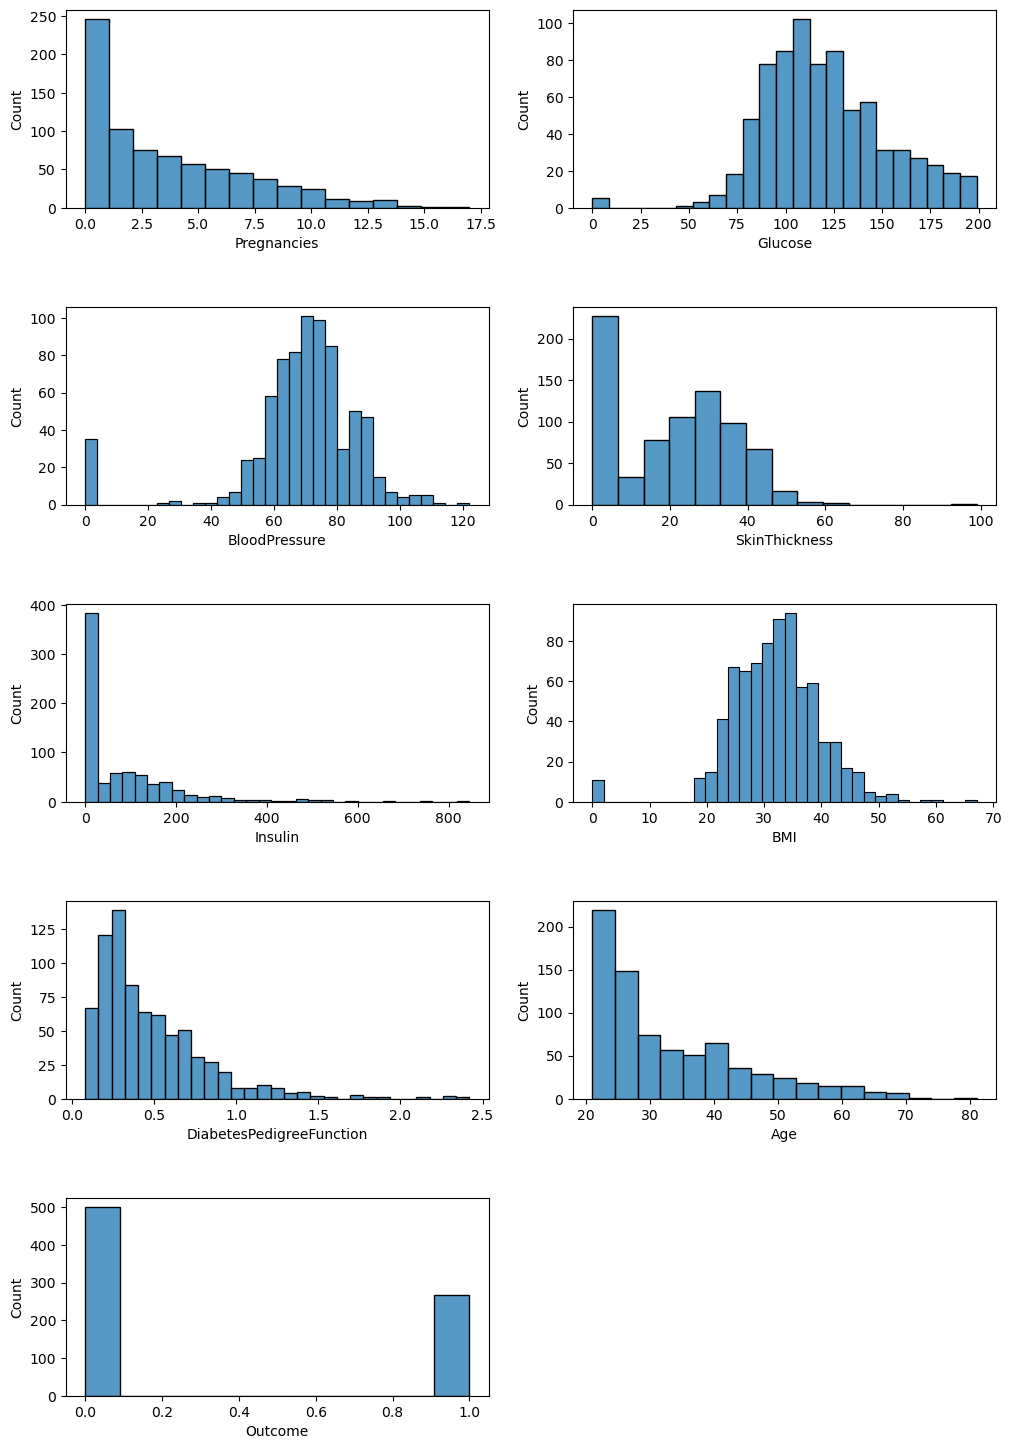

In [14]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, 
                )
    i += 1

### Values that should not be zero includes Glucose, BloodPressure, SkinThickness, Insulin and BMI

In [15]:
# replacing all such values that should not be zero with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [16]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Looking for outliers

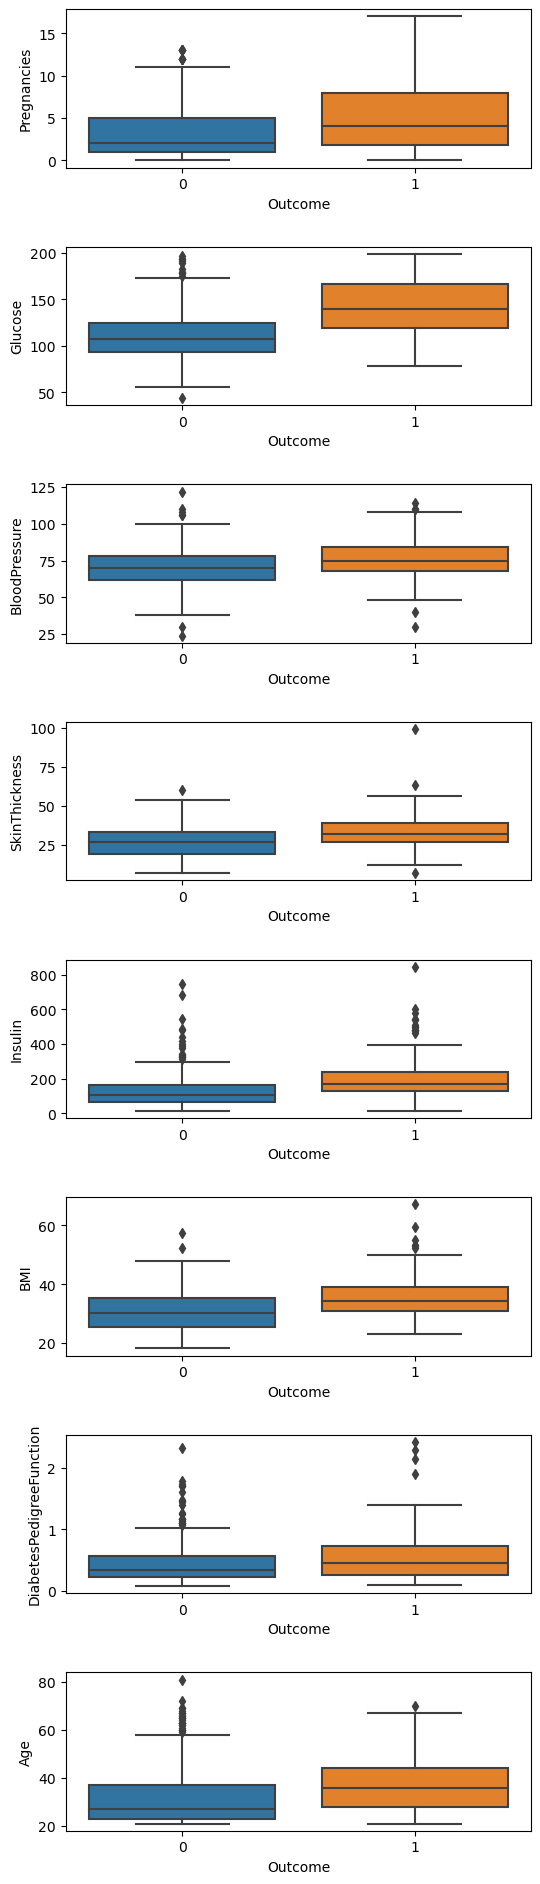

In [17]:
plt.figure(figsize=(6,36))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in df.columns.drop('Outcome'):
    plt.subplot(12,1,i)
    sns.boxplot(data=df, x='Outcome', y=col_name)
    i +=1
    


### Showing the Number of Outliers

In [18]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 1.5*iqr
upper = df.quantile(0.75) + 1.5*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()

Number of outliers


Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                3
Insulin                     24
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

### Showing the Number of extreme Outliers

In [19]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 3*iqr
upper = df.quantile(0.75) + 3*iqr

print("Number of extreme outliers")
((df < lower) + (df > upper)).sum()

Number of extreme outliers


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     8
BMI                         1
DiabetesPedigreeFunction    6
Age                         0
Outcome                     0
dtype: int64

In [20]:
df[(df['Outcome'] == 0)].quantile(0.5)

Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                27.000
Insulin                     102.500
BMI                          30.100
DiabetesPedigreeFunction      0.336
Age                          27.000
Outcome                       0.000
Name: 0.5, dtype: float64

In [21]:
df[(df['Outcome'] == 1)].quantile(0.5)

Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.500
SkinThickness                32.000
Insulin                     169.500
BMI                          34.300
DiabetesPedigreeFunction      0.449
Age                          36.000
Outcome                       1.000
Name: 0.5, dtype: float64

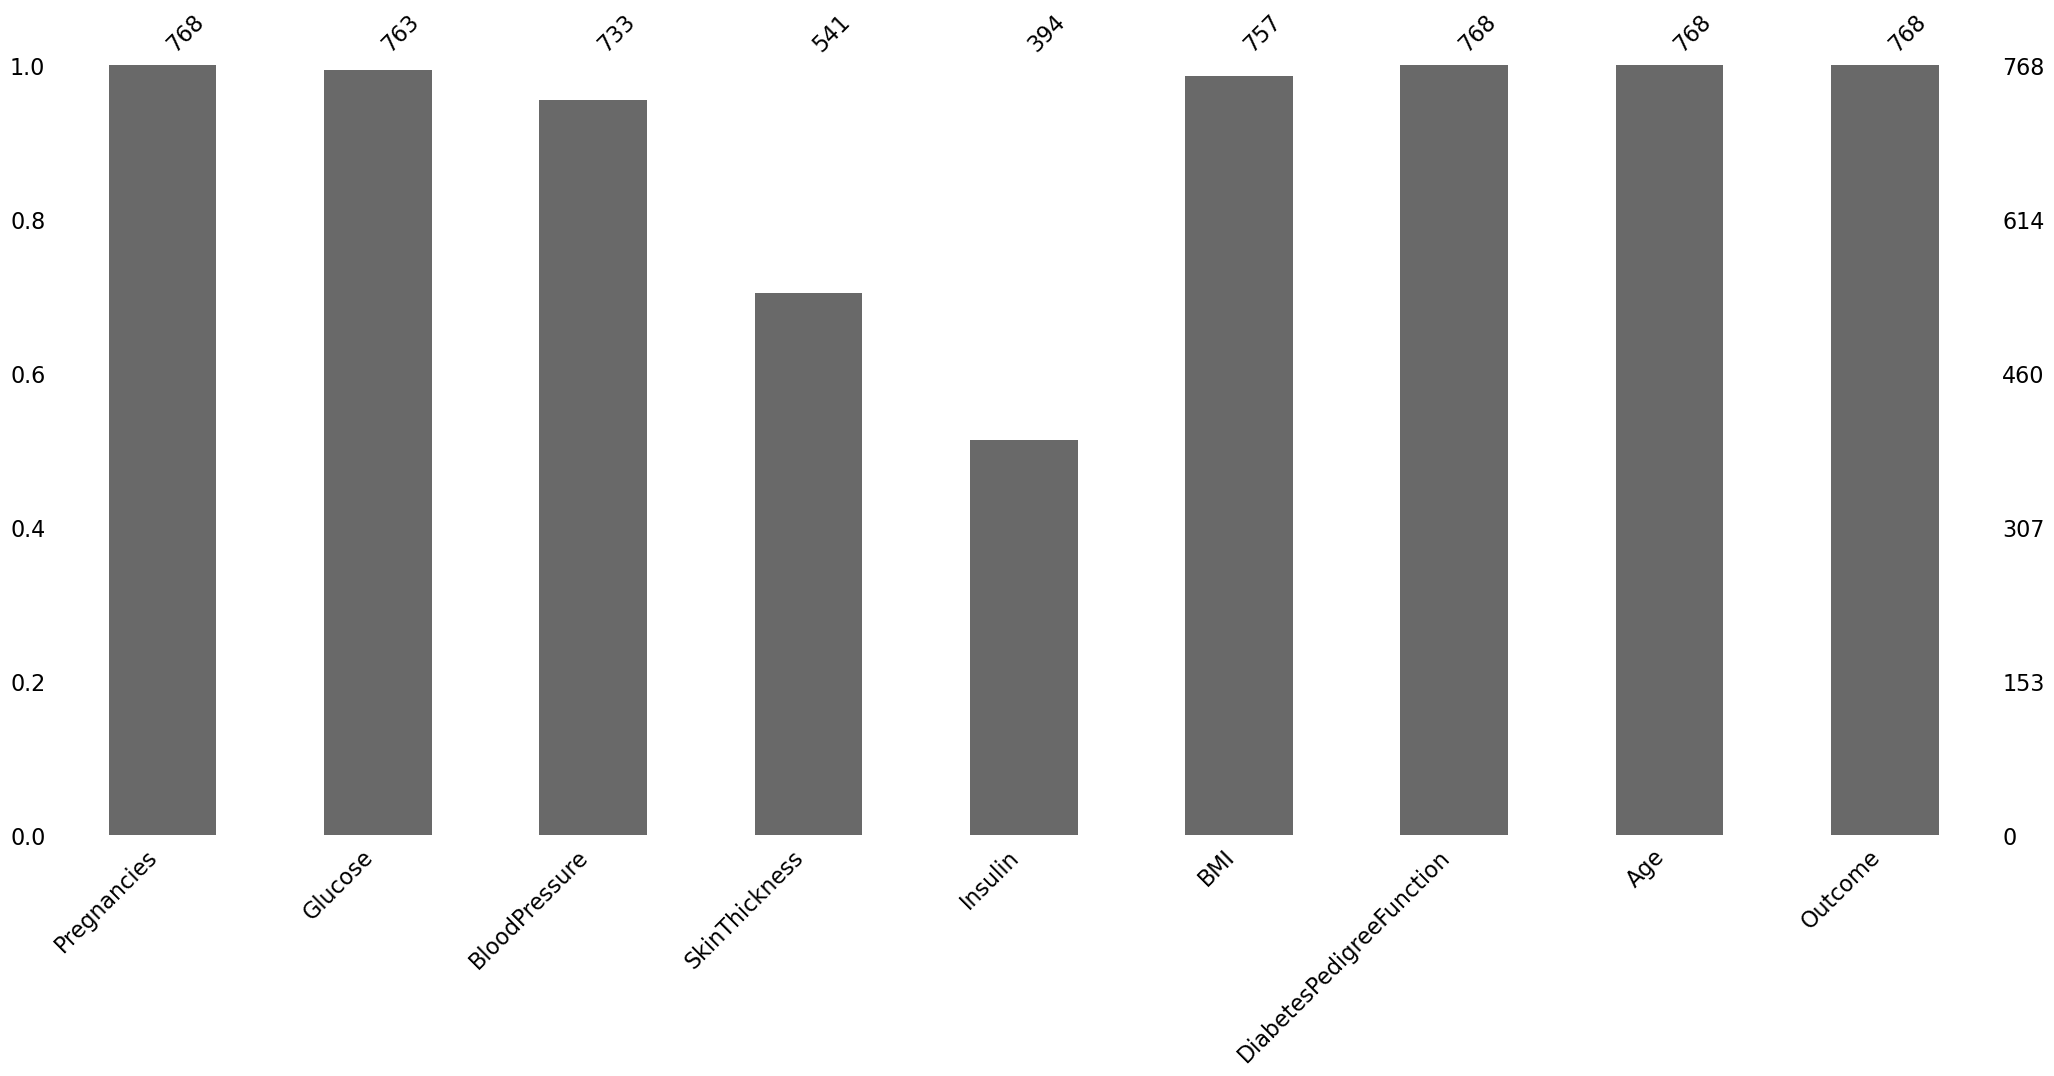

In [22]:
import missingno as msno
msno.bar(df);

### Imputation of median for Nan Values

In [23]:
median_fulldata = df.groupby('Outcome').agg('median')
dp = df.copy()

# Leak imputation
for col in df.columns.drop('Outcome'):
    df.loc[((df[col].isnull()) & (df['Outcome'] == 0)),col] = median_fulldata[col][0]
    df.loc[((df[col].isnull()) & (df['Outcome'] == 1)),col] = median_fulldata[col][1]

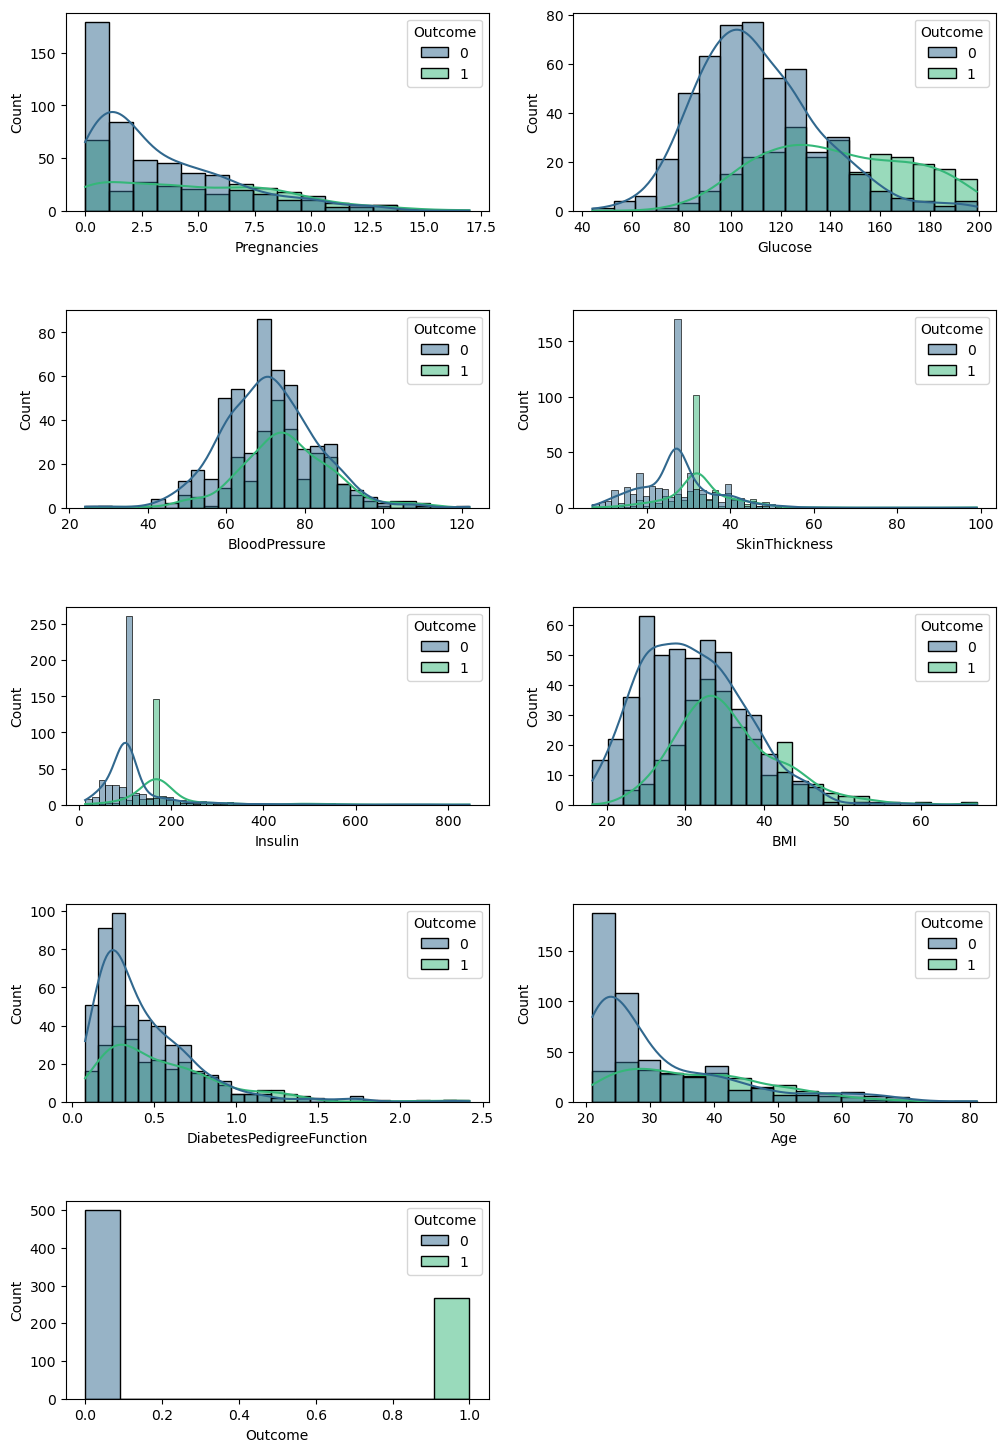

In [24]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, kde=True, hue='Outcome', multiple='layer', alpha=0.5, palette='viridis')
    i += 1

In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Using Principal Component Analysis

In [27]:
# Standardize Data
scaler = StandardScaler()                # Create Scaler
df_dropped_outcome = df.drop('Outcome', axis=1)
data_scaled = scaler.fit_transform(df_dropped_outcome)   # Fit scaler
print(data_scaled)                       # Print scaler

[[ 0.63994726  0.86462486 -0.03218035 ...  0.16948251  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20472661 -0.52812374 ... -0.84854874 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01426457 -0.69343821 ... -1.32847775  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02224005 -0.03218035 ... -0.90672195 -0.68519336
  -0.27575966]
 [-0.84488505  0.14199419 -1.02406713 ... -0.33953311 -0.37110101
   1.17073215]
 [-0.84488505 -0.94195182 -0.19749482 ... -0.2959032  -0.47378505
  -0.87137393]]


In [28]:
# Print Standardized Data in DataFrame Format since the data_scaled is returned as a numpy array
DF_scaled = pd.DataFrame(data = data_scaled,                           # Create DataFrame DF_scaled
                         columns = df_dropped_outcome.keys().values)
DF_scaled.head(6)                                                      # Print first 6 rows of DF_scaled


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496
5,0.342981,-0.186474,0.133134,-0.235210,-0.440843,-0.993982,-0.818079,-0.275760


### To Decide the Ideal Component Number

In [29]:
# Ideal Number of Components
pca = PCA(n_components = 8)                 # Create PCA object forming 10 PCs
pca_trans = pca.fit_transform(DF_scaled)     # Transform data
print(pca_trans)                             # Print transformed data
print(pca_trans.shape)                       # Print dimensions of transformed data

[[ 1.57576908 -0.6134653   0.44270608 ...  0.63477163  0.25779968
   0.22782668]
 [-1.57592986  0.07963747 -0.34085658 ...  0.12151896  0.92720983
  -0.10060341]
 [ 0.73454808 -0.543459    1.82650329 ...  1.05966566 -0.95059028
  -1.33517779]
 ...
 [-0.89459686 -0.83706579  0.23005321 ...  0.01194641 -0.32043296
  -0.3696936 ]
 [-0.07097671 -0.0043742   0.56112434 ...  0.89118108  1.13429684
   0.75359748]
 [-1.29258576  0.64661753 -0.72971575 ... -0.03435531  0.40072705
  -0.30542323]]
(768, 8)


In [30]:
prop_var = pca.explained_variance_ratio_     # Extract proportion of explained variance
print(prop_var)                              # Print proportion of explained variance

[0.29817668 0.18752573 0.14036503 0.11384376 0.09551291 0.06311189
 0.05444859 0.04701541]


In [31]:
PC_number = np.arange(pca.n_components_) + 1 # Enumarate component numbers
print(PC_number)                             # Print component numbers

[1 2 3 4 5 6 7 8]


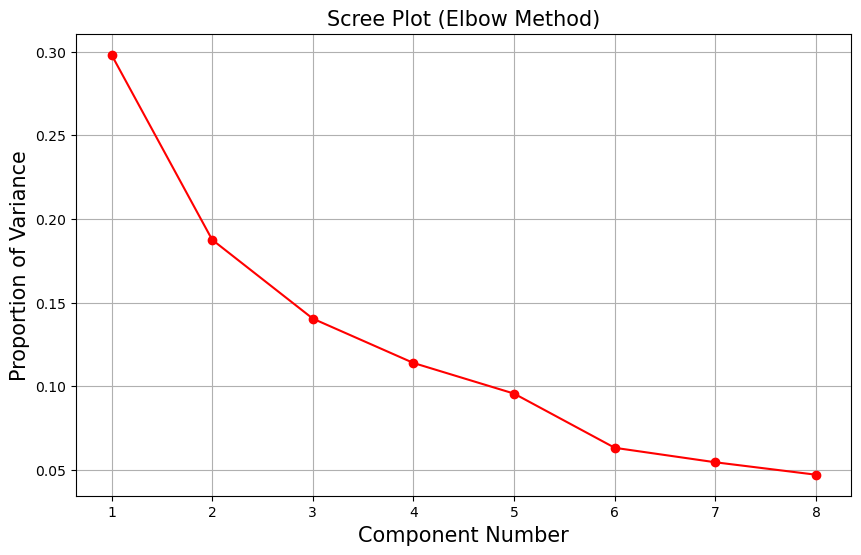

In [32]:
# Scree Plot
plt.figure(figsize=(10, 6))                 # Set figure and size
plt.plot(PC_number,                         # Plot prop var
         prop_var,
         'ro-')                             # red solid line with circle markers
plt.title('Scree Plot (Elbow Method)',      # Plot Annotations
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Proportion of Variance',
           fontsize = 15)
plt.grid()                                  # Add grid lines
plt.show()                                  # Print graph

#### Normally using the elbow method, the user is meant to select the components just before the line flattens out

#### Kaiser method can be used which suggests keeping components explaining data variation greater than 1

In [33]:
# Alternative Scree Plot Data
var = pca.explained_variance_                # Extract explained variance
print(var)                                   # Print explained variance

[2.38852349 1.50216175 1.12438429 0.91193748 0.76509953 0.50555339
 0.43615665 0.37661365]


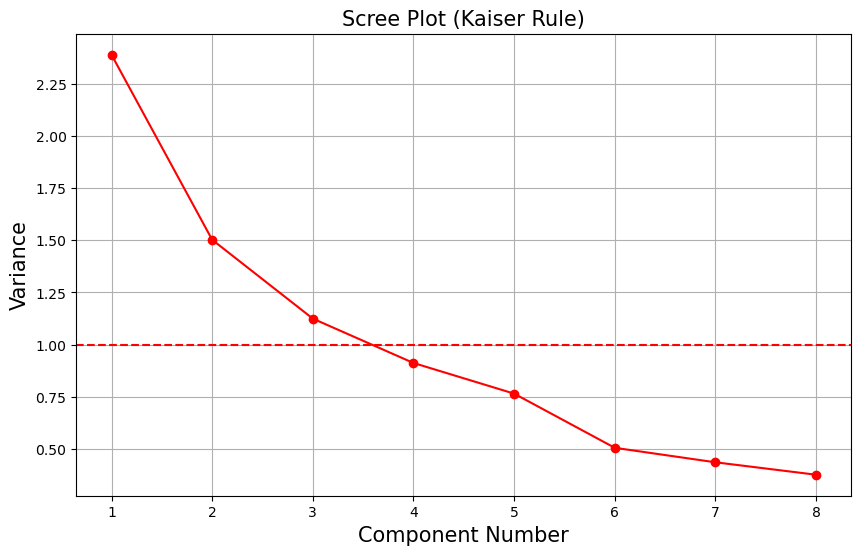

In [34]:
# Alternative Scree Plot
plt.figure(figsize=(10, 6))                 # Set figure and size
plt.plot(PC_number,                         # Plot prop var
         var,
         'ro-')
plt.title('Scree Plot (Kaiser Rule)',       # Plot Annotations
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Variance',
           fontsize = 15)
plt.axhline(y = 1,                          # Plot horizontal line
           color = 'r',
           linestyle='--')
plt.grid()                                  # Add grid lines
plt.show()                                  # Print graph

#### Based on this graph above, 3 components are ideal to keep

In [35]:
# Perform PCA forming 3 PCs
pca = PCA(n_components = 3)         # Create PCA objects forming 3 components
PC = pca.fit_transform(DF_scaled)   # Transform data
print(PC)                           # Print transformed data
print(PC.shape)                     # Print the dimension of transformed data

[[ 1.57576908 -0.6134653   0.44270608]
 [-1.57592986  0.07963747 -0.34085658]
 [ 0.73454808 -0.543459    1.82650329]
 ...
 [-0.89459686 -0.83706579  0.23005321]
 [-0.07097671 -0.0043742   0.56112434]
 [-1.29258576  0.64661753 -0.72971575]]
(768, 3)


In [36]:
# Biplot Data
PC1 = PC[:, 0]                              # Extract PC1
PC2 = PC[:, 1]                              # Extract PC2
PC3 = PC[:, 2]                              # Extract PC3

In [37]:
loadings = pca.components_                  # Extract loadings
print(loadings)                             # Print loadings
print(loadings.shape)                       # Loading shape

[[ 0.27970733  0.43216824  0.35612411  0.40314029  0.35921122  0.40332546
   0.15820113  0.35904907]
 [-0.5693849   0.07393942 -0.19299579  0.28818812  0.21876433  0.37835963
   0.26410679 -0.53783622]
 [-0.01797375  0.43375928 -0.34054597 -0.40189429  0.52771268 -0.3991541
   0.30267446  0.0679909 ]]
(3, 8)


In [38]:
# Scaling Vector
scalePC1 = 1.0/(PC1.max() - PC1.min())       # Create min-max scale for PC1
print(scalePC1)                              # Print scalePC1

scalePC2 = 1.0/(PC2.max() - PC2.min())       # Create min-max scale for PC2
print(scalePC2)                              # Print scalePC2

scalePC3 = 1.0/(PC3.max() - PC3.min())       # Create min-max scale for PC3
print(scalePC3)                              # Print scalePC3

0.11302045048804393
0.113836878047376
0.10048571672468751


In [39]:
features = df_dropped_outcome.keys().values   # Feature/Variable names
print(features)   

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [40]:
type(features)

numpy.ndarray

### PC1 vs PC2

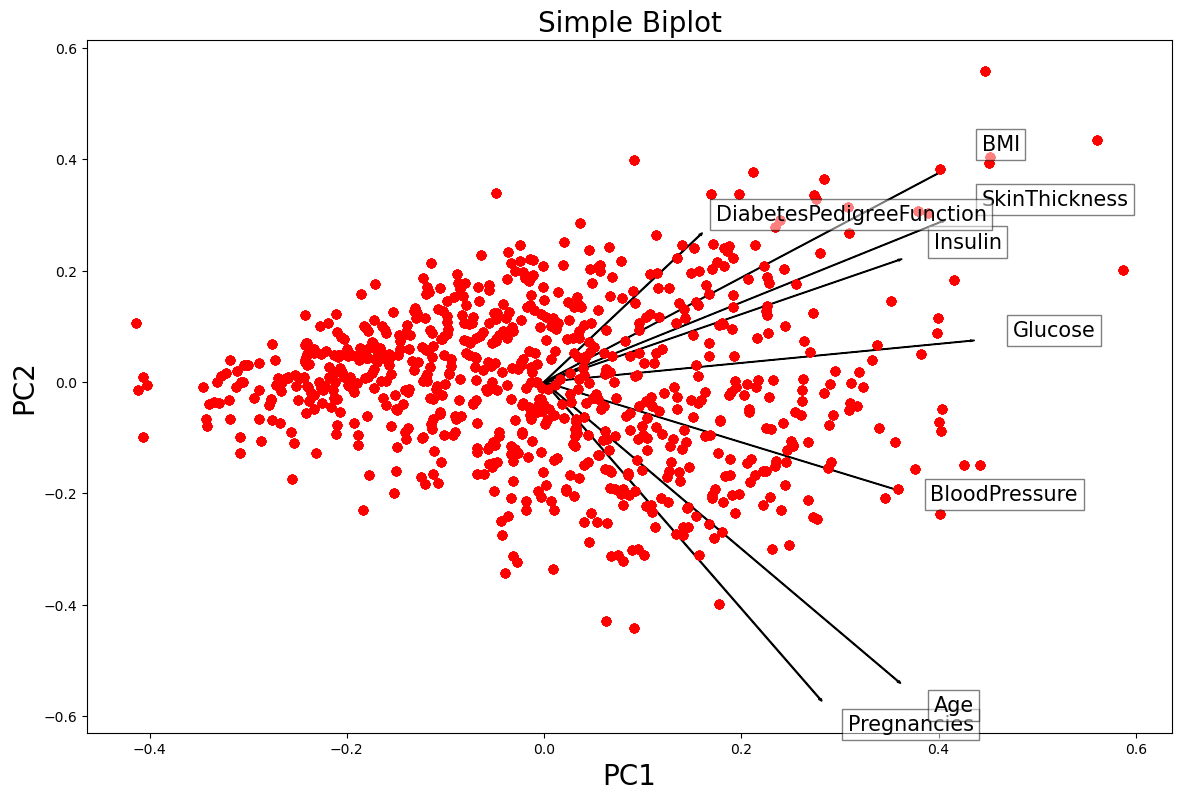

In [41]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    
    ax.scatter(PC1 * scalePC1,               # Plot data points
               PC2 * scalePC2, 
               c='r', marker='o')  
    
    ax.set_xlabel('PC1',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC2',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    

### PC1 vs PC3

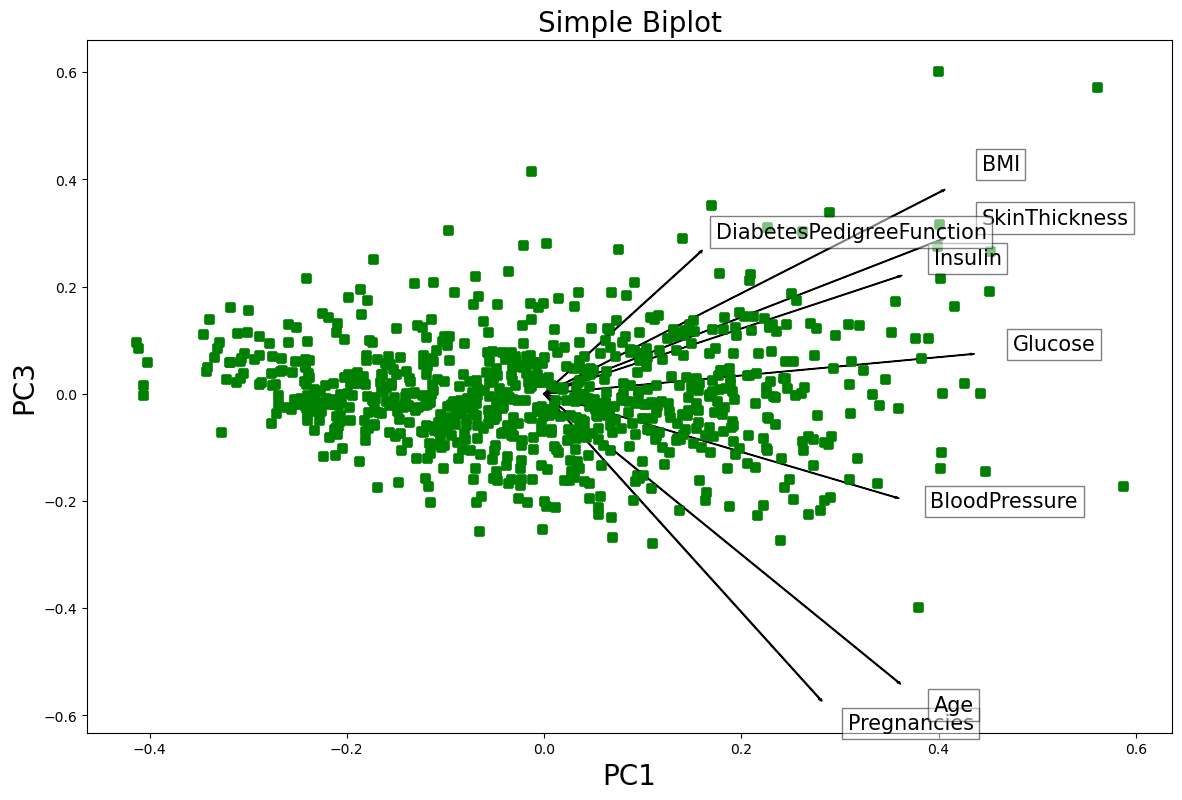

In [42]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    ax.scatter(PC1 * scalePC1,               # Plot data points
               PC3 * scalePC3, 
               c='g', marker='s')
    
    ax.set_xlabel('PC1',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC3',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    

### PC2 vs PC3

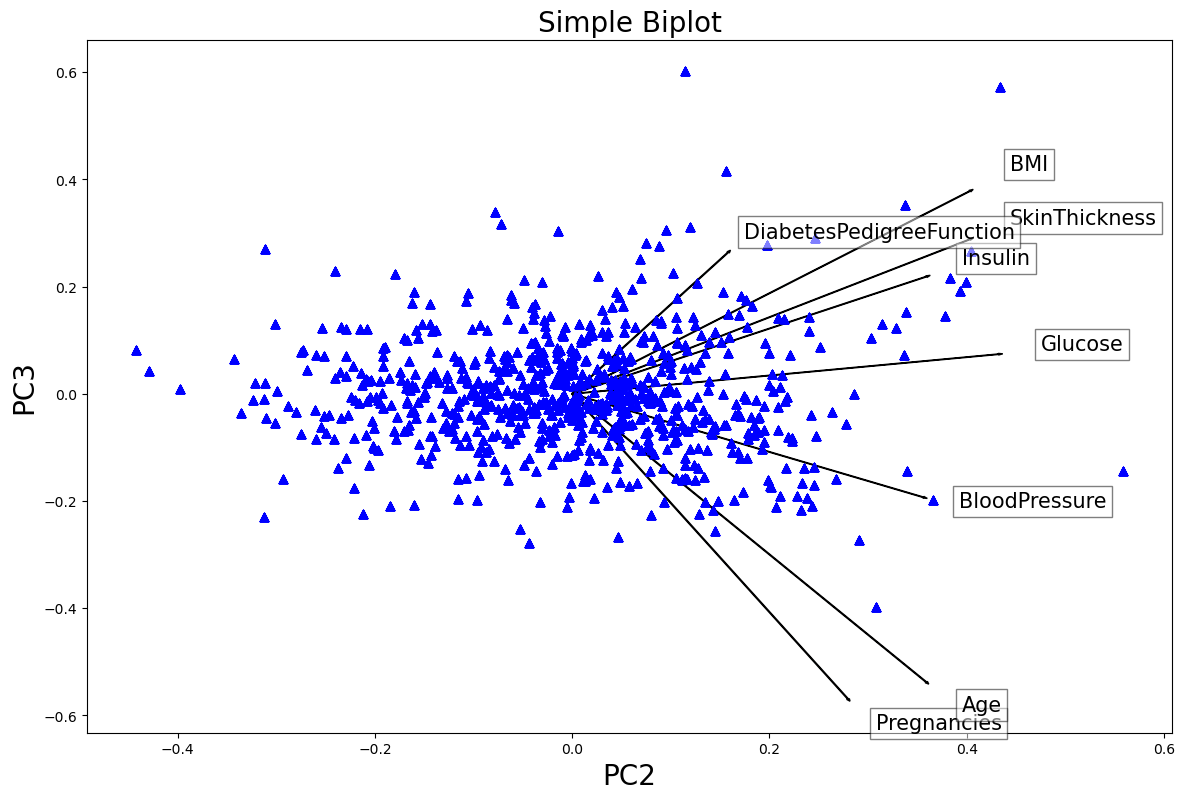

In [43]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    
    ax.scatter(PC2 * scalePC2,                # Plot data points
               PC3 * scalePC3, 
               c='b', marker='^')
    
    ax.set_xlabel('PC2',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC3',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    

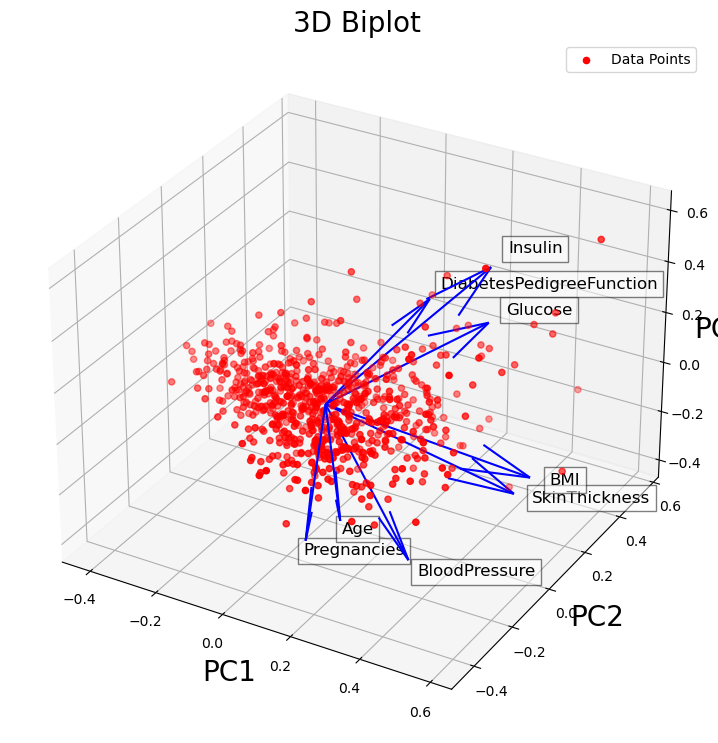

In [44]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

for i, feature in enumerate(features):
    ax.quiver(0, 0, 0,  # Plot arrows in 3D
              loadings[0, i],
              loadings[1, i],
              loadings[2, i],
              color='b')
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    label_z = loadings[2, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, label_z, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot for data points in 3D
ax.scatter(PC1 * scalePC1, PC2 * scalePC2, PC3 * scalePC3, c='r', marker='o', label='Data Points')

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
ax.set_title('3D Biplot', fontsize=20)

plt.legend()
plt.show()

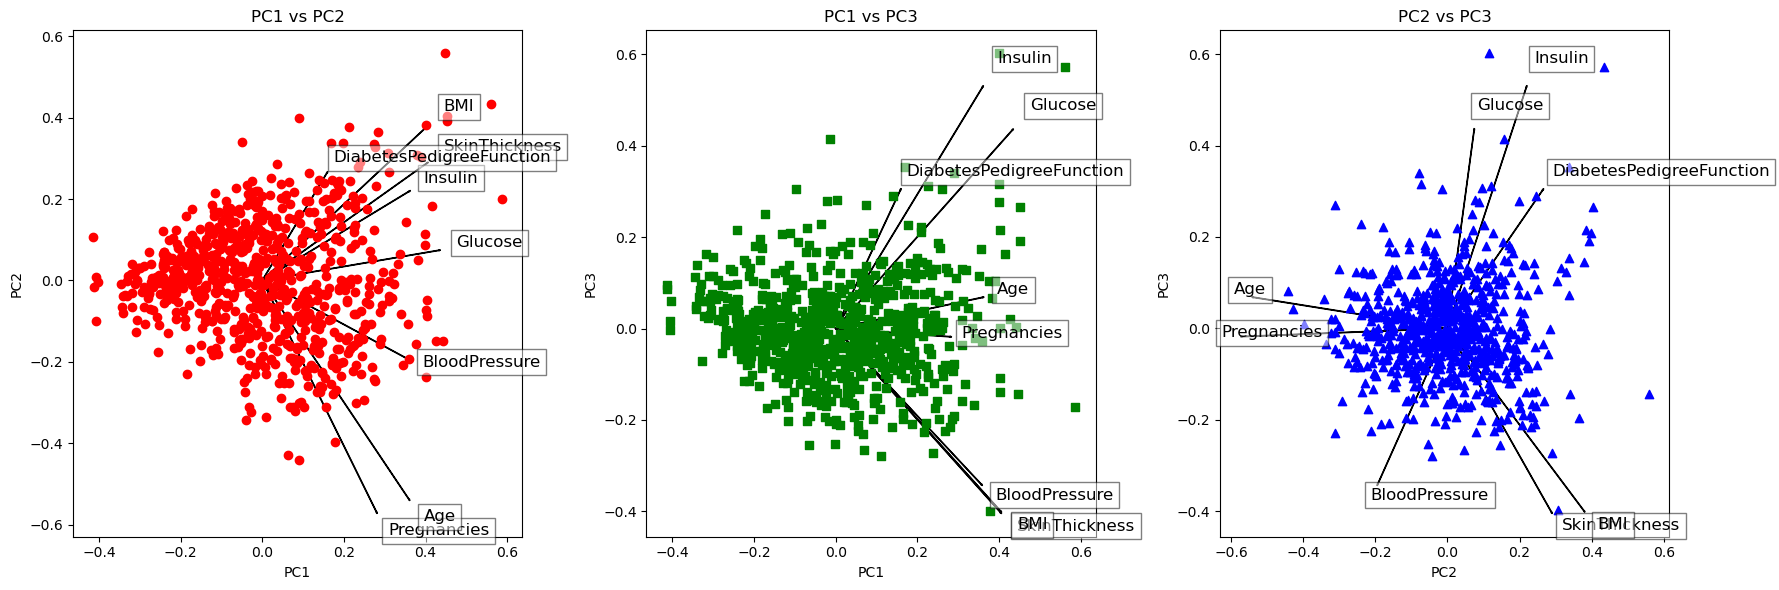

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create subplots for each pair

# Plot PC1 vs PC2
ax = axes[0]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i])
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC1 * scalePC1, PC2 * scalePC2, c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs PC2')

# Plot PC1 vs PC3
ax = axes[1]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[2, i])
    label_x = loadings[0, i] * 1.1
    label_y = loadings[2, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC1 * scalePC1, PC3 * scalePC3, c='g', marker='s')
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')
ax.set_title('PC1 vs PC3')

# Plot PC2 vs PC3
ax = axes[2]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[1, i], loadings[2, i])
    label_x = loadings[1, i] * 1.1
    label_y = loadings[2, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC2 * scalePC2, PC3 * scalePC3, c='b', marker='^')
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_title('PC2 vs PC3')

plt.tight_layout()
plt.show()

## Using t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [46]:
# Checking the content of features
features

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

### Separate features and target variable

In [47]:
# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Scaling Data : Standardize the features (important for t-SNE)

In [48]:
# Standardize the features (important for t-SNE)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply t-SNE

In [49]:
# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

### Using a new DataFrame for the t-SNE results (Seaborn)

In [50]:
# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['Outcome'] = y

### Visualisation: Plot the t-SNE results using Seaborn

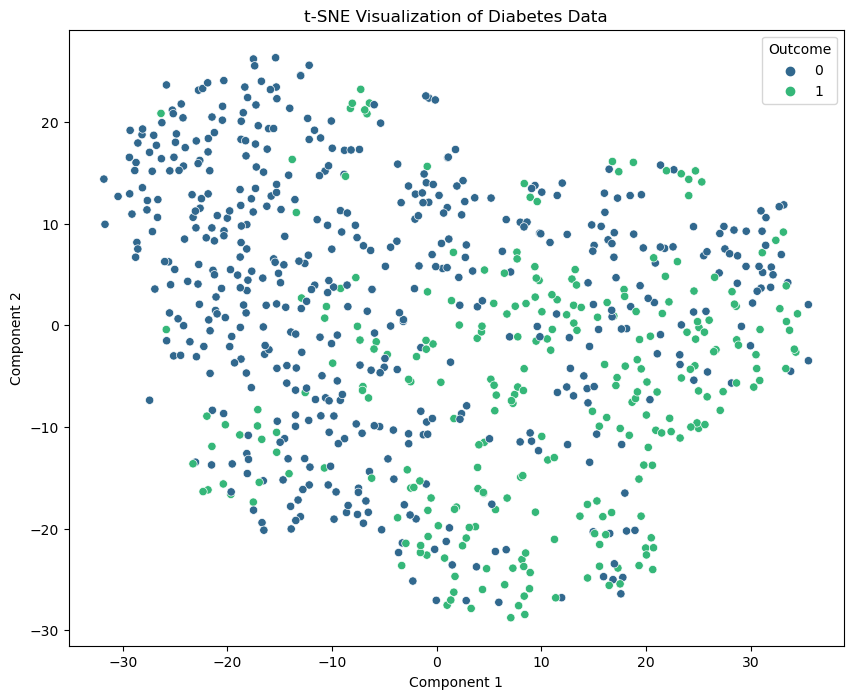

In [51]:
# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Diabetes Data')
plt.show()

### Using a new DataFrame for the t-SNE results (Matplotlib)

In [52]:
# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Outcome'] = y

### Visualisation: Plot the t-SNE results using Matplotlib alone

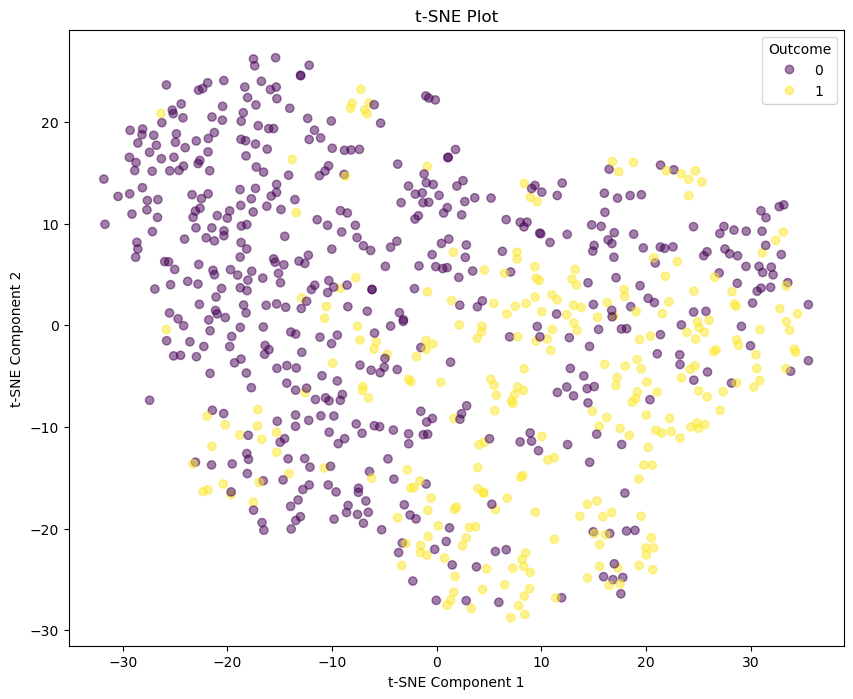

In [53]:
# Plot the t-SNE graph using plt.scatter()
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x='TSNE1', y='TSNE2', data=tsne_df, c='Outcome', cmap='viridis', alpha=0.5)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Outcome')
plt.show()

## Using MDS (Multi Dimension Scaling)

### Separate features and target variable

In [54]:
# Separate features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Scaling Data : Standardize the features

In [55]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


### Apply MDS to reduce dimensionality

In [56]:
# Apply MDS to reduce dimensionality
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_standardized)

### Using a new DataFrame for the MDS results

In [57]:
# Create a new DataFrame for the MDS results
mds_df = pd.DataFrame(data=X_mds, columns=['MDS1', 'MDS2'])
mds_df['Outcome'] = y

### Visualisation: Plot the MDS results using Seaborn

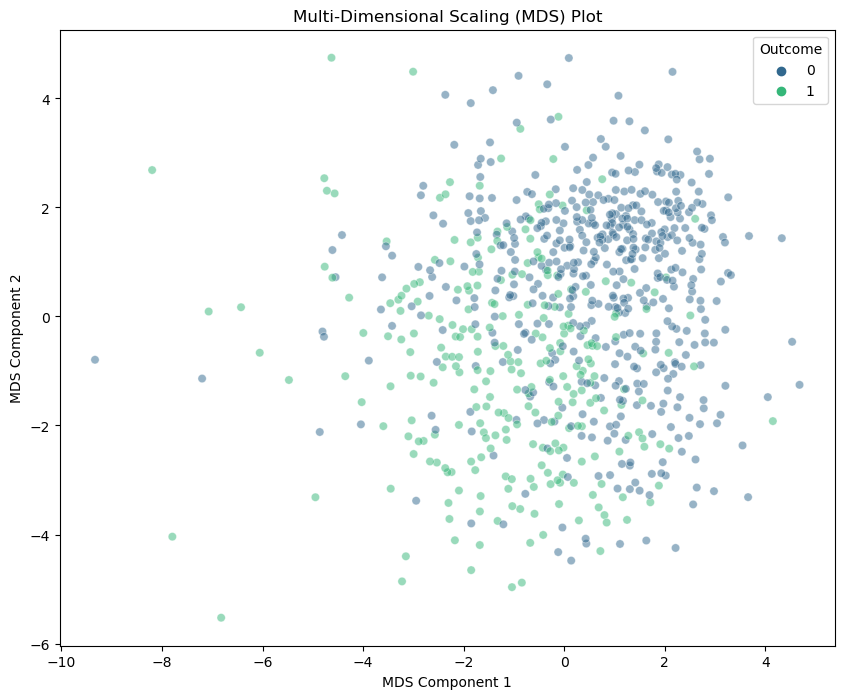

In [58]:
# Plot the MDS graph using sns.scatterplot()
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MDS1', y='MDS2', data=mds_df, hue='Outcome', palette='viridis', alpha=0.5)
plt.title('Multi-Dimensional Scaling (MDS) Plot')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(title='Outcome')
plt.show()

### Visualisation: Plot the MDS results using Matplotlib alone

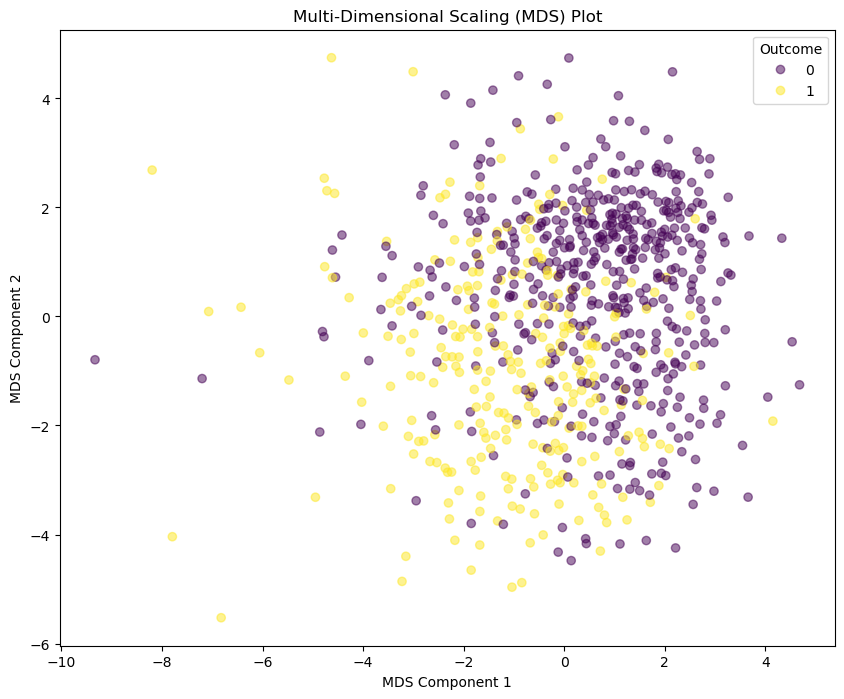

In [59]:
# Plot the MDS graph using plt.scatter()
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x='MDS1', y='MDS2', data=mds_df, c='Outcome', cmap='viridis', alpha=0.5)
plt.title('Multi-Dimensional Scaling (MDS) Plot')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(*scatter.legend_elements(), title='Outcome')
plt.show()

## Building a Logistic Regression Model after applying PCA

In [60]:
# Checking for the value of y
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Splitting the data into training and testing sets after applying PCA

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PC, y, test_size=0.2, random_state=42)

### Building the Logistic Regression model

In [62]:
# Build Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Make predictions on the test set

In [63]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [64]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [65]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [66]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

### Display the results obtained

In [67]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.77
Confusion Matrix:
[[81 18]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



### Plotting the confusion matrix

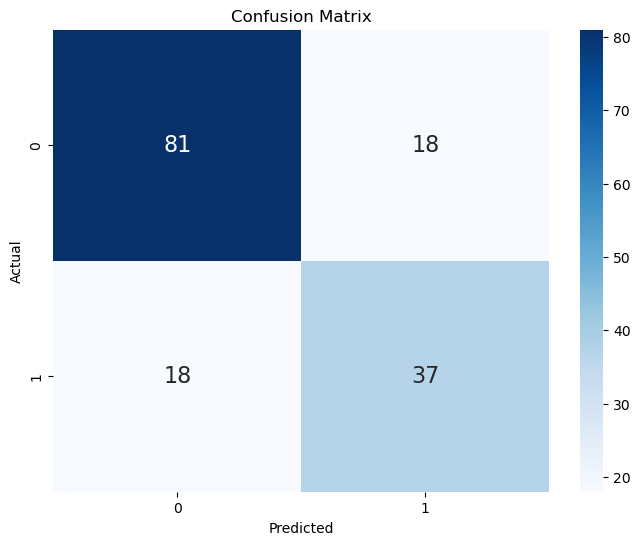

In [68]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

In [69]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

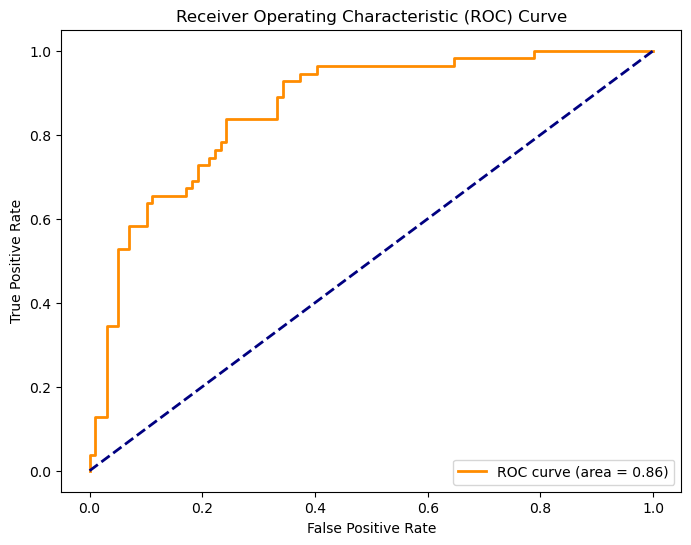

In [70]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [71]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def log_learn_curve(X,y,c,n_components=None):
        ''' param X: Matrix of input features
            param y: Vector of Target/Label
            c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
        '''
        '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
           KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
           Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
           n_components: Number of principal components for PCA. If None, PCA will not be applied
        '''
    
        le = LabelEncoder() # Label encoding the target
        sc = StandardScaler() # Scaling the input features
        y = le.fit_transform(y)#Label Encoding the target
        
        if n_components is not None:
            pca = PCA(n_components=n_components)
            X = pca.fit_transform(X)
    
        log_reg = LogisticRegression(max_iter=200, random_state=11, C=c)  # LogisticRegression model
    
        # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
        lr = Pipeline(steps=[('scaler', sc), ('classifier', log_reg)])
    
        cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
        cv_scores = cross_val_score(lr, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
        lr.fit(X, y)  # Fitting the model

        train_score = lr.score(X, y)  # Scoring the model on the train set
    
        # Building the learning curve
        train_size, train_scores, test_scores = learning_curve(estimator=lr, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
        train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
        test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
        lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
        return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}


### The Learning curve of a Logistic Regression Model with PCA used

Cross Validation Accuracies:
-------------------------
[0.7792207792207793, 0.7532467532467533, 0.7207792207792207, 0.7516339869281046, 0.7777777777777778]

Mean Cross Validation Accuracy:
-------------------------
0.7565317035905271

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.021350449062090708

Training Accuracy:
---------------
0.7591145833333334




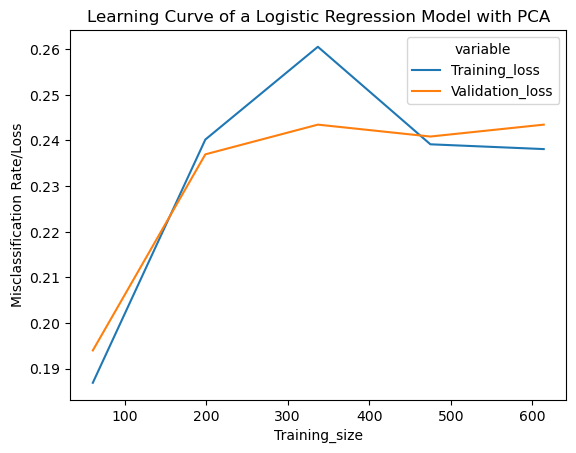

In [72]:
lc = log_learn_curve(X,y,1,n_components=3)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Logistic Regression Model with PCA")
plt.ylabel("Misclassification Rate/Loss");

## Building a Logistic Regression Model after applying t-SNE

### Standardize the data

In [73]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply t-SNE for dimensionality reduction

In [74]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

### Split the t-SNE-transformed data into training and testing sets

In [75]:
# Split the t-SNE-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

### Build Logistic Regression model

In [76]:
# Build Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [77]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

### Evaluate the model

In [78]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[76 23]
 [25 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.57      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



### Plotting the confusion matrix

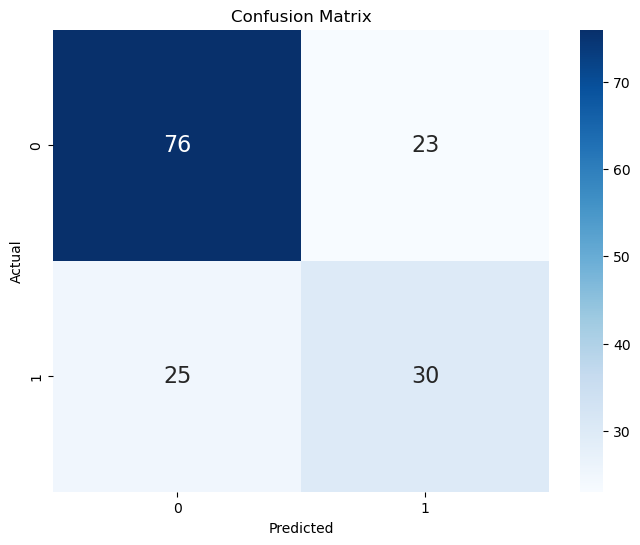

In [79]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

In [80]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

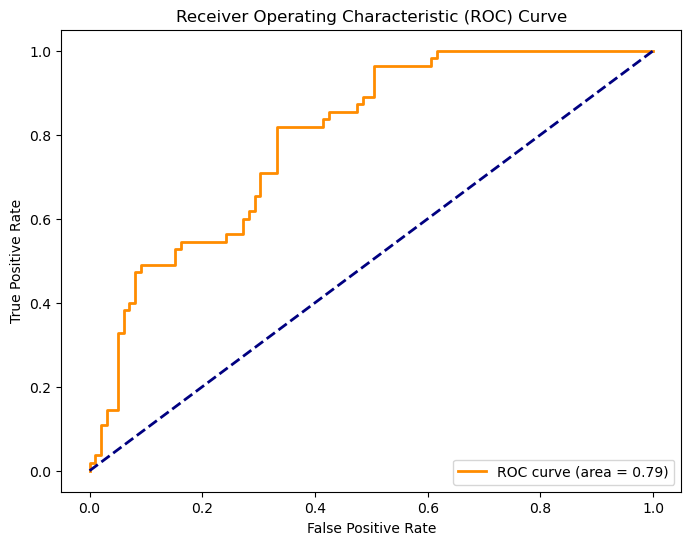

In [81]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Plot the t-SNE visualization

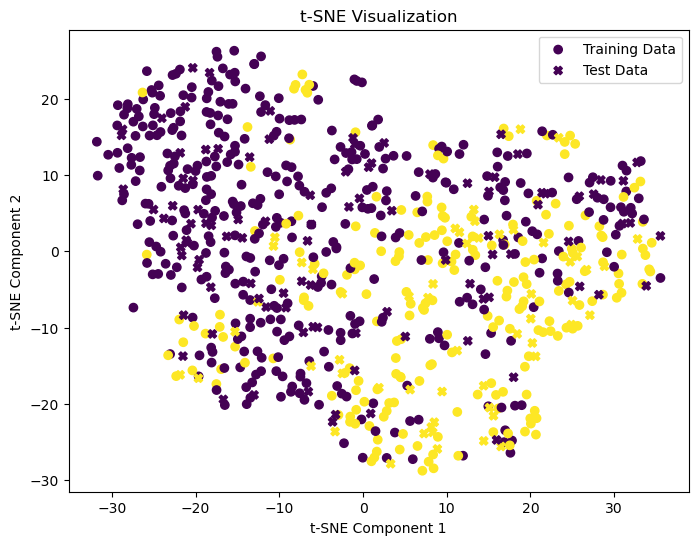

In [82]:
# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='X', label='Test Data')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [83]:
def log_learn_curve_tsne(X, y, c, n_components=2, perplexity=30):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    n_components: Number of dimensions for t-SNE. Default is 2 for visualization.
    perplexity: Perplexity parameter for t-SNE.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=11)
    X_tsne = tsne.fit_transform(X)
    
    log_reg = LogisticRegression(max_iter=200, random_state=11, C=c)  # LogisticRegression model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    lr = Pipeline(steps=[('scaler', sc), ('classifier', log_reg)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr, X_tsne, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    lr.fit(X_tsne, y)  # Fitting the model

    train_score = lr.score(X_tsne, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=lr, X=X_tsne, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Logistic Regression Model with t-SNE used

Cross Validation Accuracies:
-------------------------
[0.8701298701298701, 0.8376623376623377, 0.8051948051948052, 0.8562091503267973, 0.8366013071895425]

Mean Cross Validation Accuracy:
-------------------------
0.8411594941006706

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.021873458158071117

Training Accuracy:
---------------
0.8411458333333334




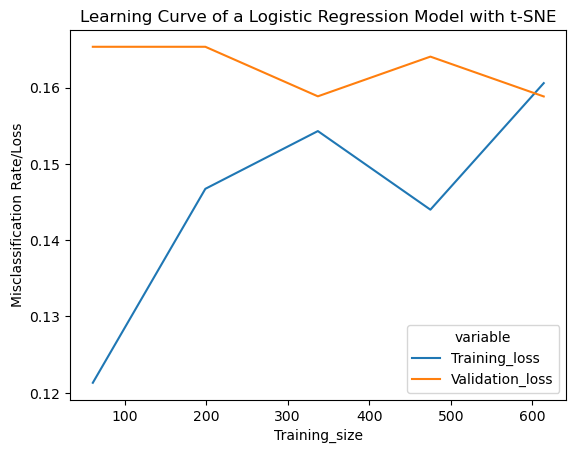

In [84]:
lc_tsne = log_learn_curve_tsne(X,y,1,n_components=2, perplexity=30)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_tsne["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_tsne["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_tsne["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_tsne["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Logistic Regression Model with t-SNE")
plt.ylabel("Misclassification Rate/Loss");

## Building a Logistic Regression Model after applying Multi Dimensional Scaling (MDS)

### Standardize the data

In [85]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply MDS for dimensionality reduction

In [86]:
# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

### Split the MDS-transformed data into training and testing sets

In [87]:
# Split the MDS-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_mds, y, test_size=0.2, random_state=42)

### Build Logistic Regression model

In [88]:
# Build Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [89]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

### Evaluate the model

In [90]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[82 17]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



### Plot the confusion matrix

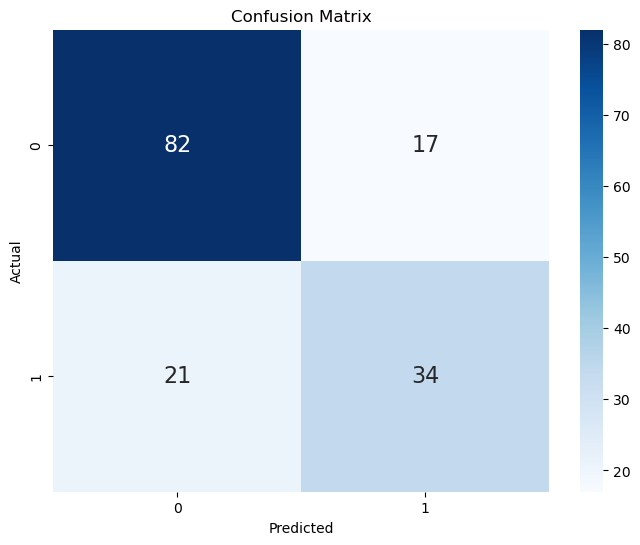

In [91]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

In [92]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

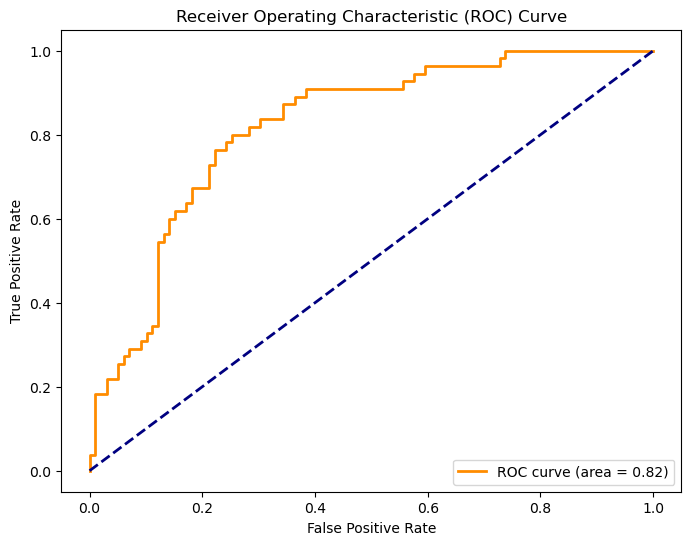

In [93]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [94]:
def log_learn_curve_mds(X, y, c, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    n_components: Number of dimensions for MDS. If None, MDS will not be applied.
    '''

    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        mds = MDS(n_components=n_components, random_state=11)
        X = mds.fit_transform(X)
    
    log_reg = LogisticRegression(max_iter=200, random_state=11, C=c)  # LogisticRegression model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    lr = Pipeline(steps=[('scaler', sc), ('classifier', log_reg)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    lr.fit(X, y)  # Fitting the model

    train_score = lr.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=lr, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Logistic Regression Model with MDS used

Cross Validation Accuracies:
-------------------------
[0.7662337662337663, 0.7792207792207793, 0.7142857142857143, 0.7581699346405228, 0.7647058823529411]

Mean Cross Validation Accuracy:
-------------------------
0.7565232153467447

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.022195262665680053

Training Accuracy:
---------------
0.8411458333333334




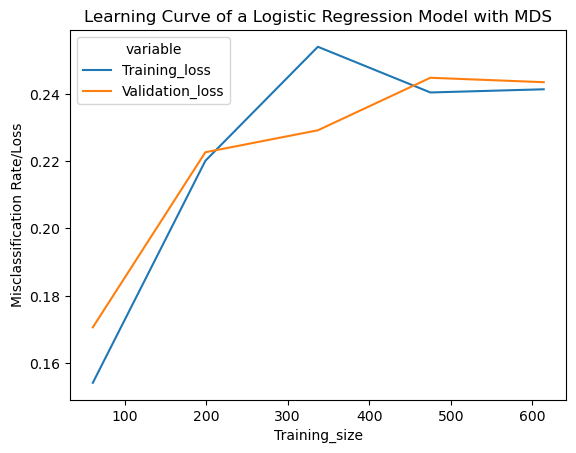

In [95]:
lc_mds = log_learn_curve_mds(X,y,1,n_components=2)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_mds["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_mds["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_mds["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_mds["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Logistic Regression Model with MDS")
plt.ylabel("Misclassification Rate/Loss");

## Building a Logistic Regression Model with no dimensionality reduction techniques

### Split the data into training and testing sets

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# Building and training the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### Making predictions on the test set

In [99]:
# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

In [100]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [101]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [102]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

### Displaying the results

In [103]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.77
Confusion Matrix:
[[83 16]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



### Plotting the confusion matrix

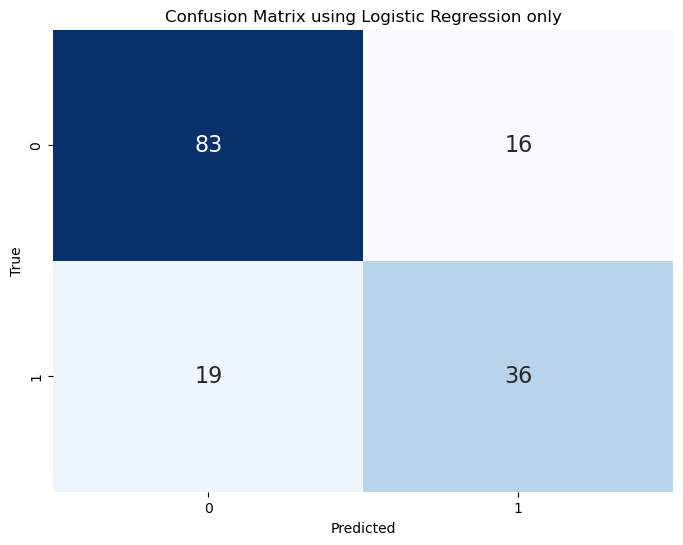

In [104]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using Logistic Regression only')
plt.show()

### The Learning curve of a Logistic Regression Model with no dimensionality reduction technique used

Cross Validation Accuracies:
-------------------------
[0.7662337662337663, 0.7857142857142857, 0.7402597402597403, 0.7712418300653595, 0.7973856209150327]

Mean Cross Validation Accuracy:
-------------------------
0.7721670486376369

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.019357893571016062

Training Accuracy:
---------------
0.7760416666666666




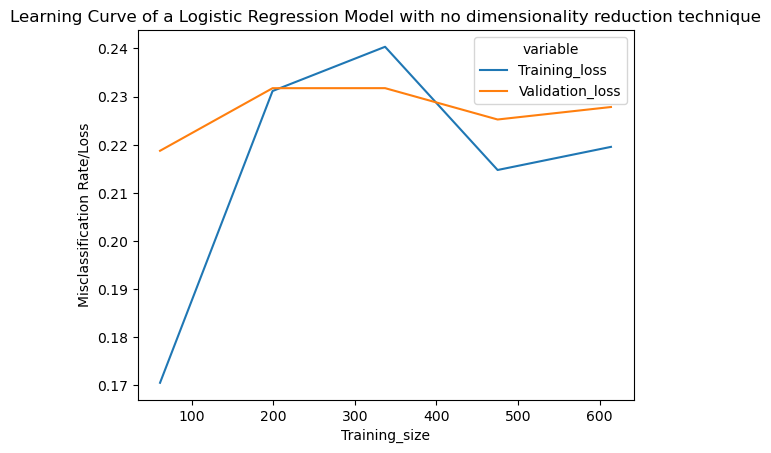

In [105]:
lc = log_learn_curve(X,y,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Logistic Regression Model with no dimensionality reduction technique")
plt.ylabel("Misclassification Rate/Loss");

## Building a Support Vector Machine Model after applying PCA

### Splitting into train and test sets after applying PCA

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PC, y, test_size=0.2, random_state=42)

### Building and training the Support Vector Machine (SVM) model

In [107]:
# Building and training the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Make predictions on the test set

In [108]:
# Making predictions on the test set
y_pred = svm_model.predict(X_test)

In [109]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [110]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [111]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

### Displaying the results

In [112]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.77
Confusion Matrix:
[[83 16]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



### Plotting the confusion matrix

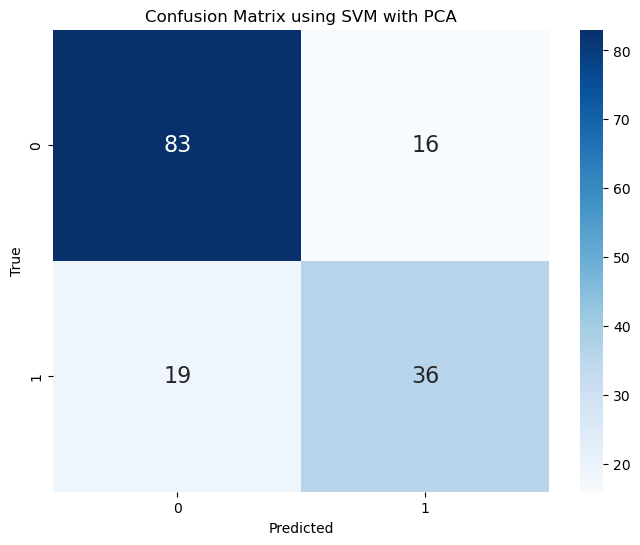

In [113]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM with PCA')
plt.show()

In [114]:
def svc_learn_curve(X, y, c, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Regularization parameter for the SVC
    n_components: Number of principal components for PCA. If None, PCA will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X = pca.fit_transform(X)
    
    svc = SVC(C=c, kernel='linear', random_state=11)  # Support Vector Classifier (SVC) model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    svm = Pipeline(steps=[('scaler', sc), ('classifier', svc)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(svm, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    svm.fit(X, y)  # Fitting the model

    train_score = svm.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=svm, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of Support Vector Machine with PCA used

Cross Validation Accuracies:
-------------------------
[0.7727272727272727, 0.7662337662337663, 0.7467532467532467, 0.7647058823529411, 0.7777777777777778]

Mean Cross Validation Accuracy:
-------------------------
0.7656395891690009

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.010540300428092194

Training Accuracy:
---------------
0.7669270833333334




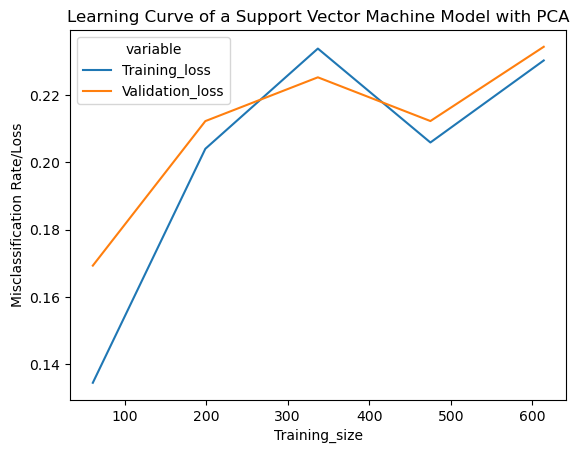

In [115]:
lc = svc_learn_curve(X,y,1,n_components=3)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Support Vector Machine Model with PCA")
plt.ylabel("Misclassification Rate/Loss");

## Building a Support Vector Machine Model after applying t-SNE

### Standardize the data

In [116]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply t-SNE for dimensionality reduction

In [117]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

### Split the t-SNE-transformed data into training and testing sets

In [118]:
# Split the t-SNE-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

### Build Support Vector Machine (SVM) model

In [119]:
# Build Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [120]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

### Evaluate the model

In [121]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### Display the results

In [122]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
[[80 19]
 [18 37]]


### Plot the confusion matrix

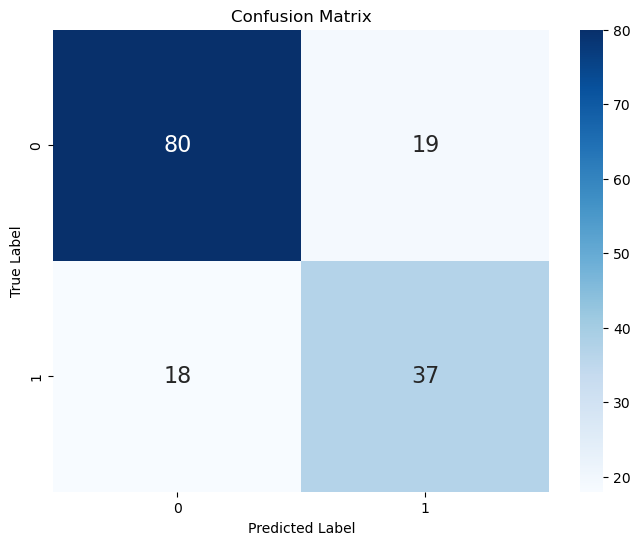

In [123]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [124]:
def svc_learn_curve_tsne(X, y, c, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Regularization parameter for the SVC
    n_components: Number of dimensions for t-SNE. If None, t-SNE will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        tsne = TSNE(n_components=n_components, perplexity=30, random_state=11)
        X = tsne.fit_transform(X)
    
    svc = SVC(C=c, kernel='linear', random_state=11)  # Support Vector Classifier (SVC) model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    svm = Pipeline(steps=[('scaler', sc), ('classifier', svc)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(svm, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    svm.fit(X, y)  # Fitting the model

    train_score = svm.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=svm, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Support Vector Machine with t-SNE used

Cross Validation Accuracies:
-------------------------
[0.8831168831168831, 0.8506493506493507, 0.7987012987012987, 0.8496732026143791, 0.8366013071895425]

Mean Cross Validation Accuracy:
-------------------------
0.8437484084542908

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.0272504170238359

Training Accuracy:
---------------
0.84375




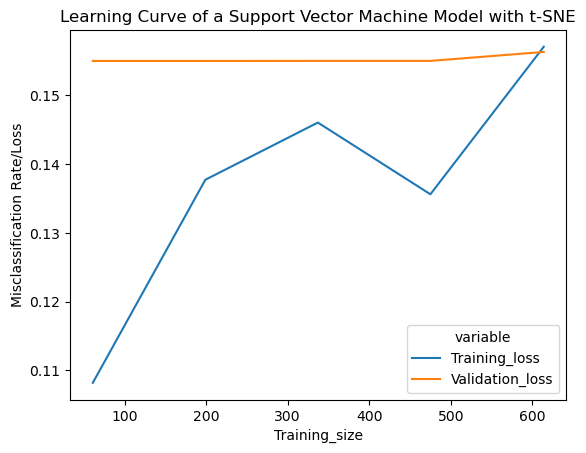

In [125]:
lc_tsne = svc_learn_curve_tsne(X,y,1,n_components=2)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_tsne["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_tsne["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_tsne["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_tsne["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Support Vector Machine Model with t-SNE")
plt.ylabel("Misclassification Rate/Loss");

## Building a Support Vector Machine Model after applying MDS

### Standardize the data

In [126]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply Multi-Dimensional Scaling (MDS) for dimensionality reduction

In [127]:
# Apply Multi-Dimensional Scaling (MDS) for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

### Split the MDS-transformed data into training and testing sets

In [128]:
# Split the MDS-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_mds, y, test_size=0.2, random_state=42)

### Build Support Vector Machine (SVM) model

In [129]:
# Build Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

### Evaluate the model

In [130]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### Print the results

In [131]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
[[80 19]
 [17 38]]


### Plot the confusion matrix

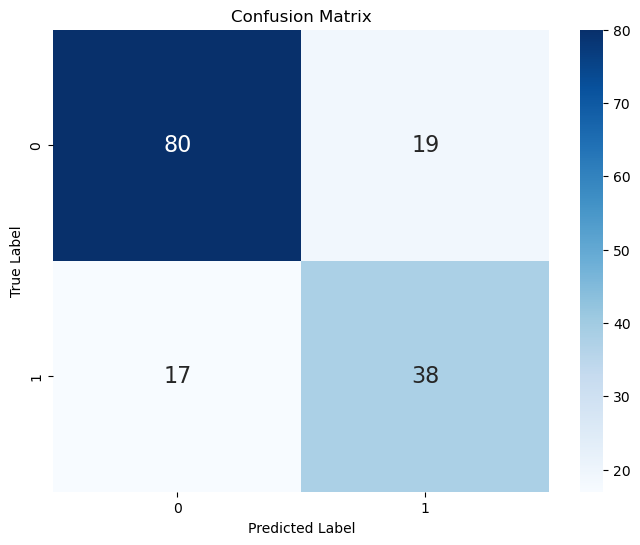

In [132]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [133]:
def svc_learn_curve_mds(X, y, c, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Regularization parameter for the SVC
    n_components: Number of dimensions for MDS. If None, MDS will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        mds = MDS(n_components=n_components, random_state=11)
        X = mds.fit_transform(X)
    
    svc = SVC(C=c, kernel='rbf', random_state=11)  # Support Vector Classifier (SVC) model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    svm = Pipeline(steps=[('scaler', sc), ('classifier', svc)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(svm, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    svm.fit(X, y)  # Fitting the model

    train_score = svm.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=svm, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Support Vector Machine with MDS used

Cross Validation Accuracies:
-------------------------
[0.8831168831168831, 0.8246753246753247, 0.8246753246753247, 0.8627450980392157, 0.8300653594771242]

Mean Cross Validation Accuracy:
-------------------------
0.8450555979967745

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.023736040819545844

Training Accuracy:
---------------
0.84375




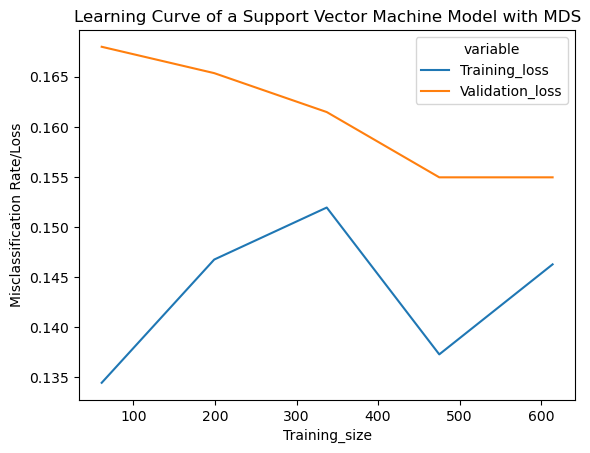

In [134]:
lc_mds = svc_learn_curve_mds(X,y,1,n_components=2)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_mds["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_mds["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_mds["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_mds["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Support Vector Machine Model with MDS")
plt.ylabel("Misclassification Rate/Loss");

## Building a Support Vector Machine Model with no dimensionality reduction techniques

### Split the data into training and testing sets

In [135]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building and training the Support Vector Machine (SVM) model

In [137]:
# Building and training the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

### Making predictions on the test set

In [138]:
# Making predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

In [139]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [140]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [141]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
classification_report_svm = classification_report(y_test, y_pred)

### Displaying the results

In [142]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(classification_report_svm)

Accuracy: 0.79
Confusion Matrix:
[[86 13]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        99
           1       0.73      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



### Plotting the confusion matrix

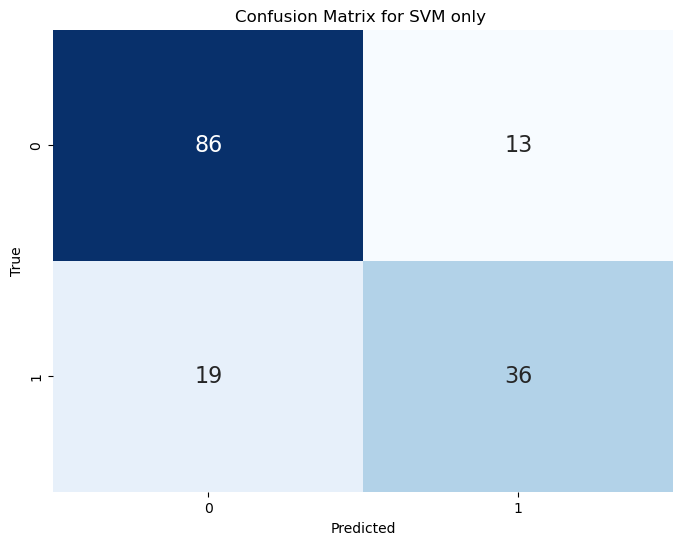

In [143]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM only ')
plt.show()

### The Learning curve of a Support Vector Machine with no dimensionality reduction technique

Cross Validation Accuracies:
-------------------------
[0.7662337662337663, 0.7857142857142857, 0.7662337662337663, 0.7777777777777778, 0.7908496732026143]

Mean Cross Validation Accuracy:
-------------------------
0.777361853832442

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.00999525937271405

Training Accuracy:
---------------
0.78515625




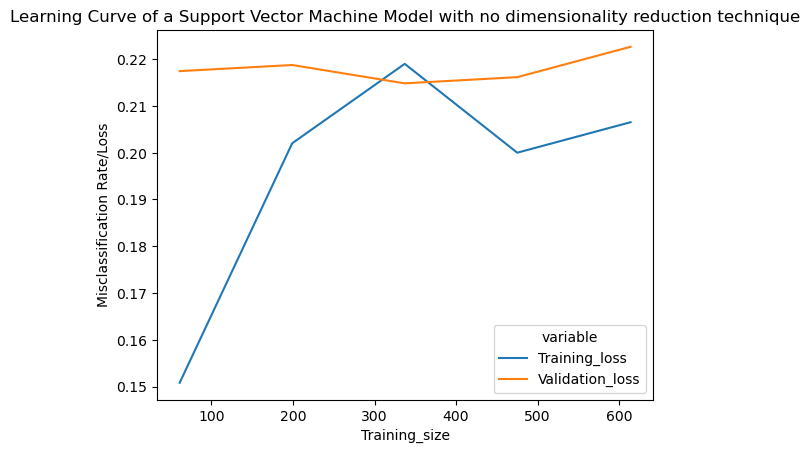

In [144]:
lc = svc_learn_curve(X,y,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Support Vector Machine Model with no dimensionality reduction technique")
plt.ylabel("Misclassification Rate/Loss");

## Building a Random Forest Model after applying PCA

### Splitting into train and test sets after applying PCA

In [145]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PC, y, test_size=0.2, random_state=42)

### Build the Random Forest model

In [146]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make predictions on the test set

In [147]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [148]:
print(type(y_pred_rf))

<class 'numpy.ndarray'>


In [149]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [150]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

### Displaying the Evaluation

In [151]:
# Print the accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report_rf)
# Calculate and display log loss
loss = log_loss(y_test, y_pred_rf)
print(f"\nLog Loss: {loss}")

Accuracy: 0.7922077922077922
Confusion Matrix:
 [[77 22]
 [10 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        99
           1       0.67      0.82      0.74        55

    accuracy                           0.79       154
   macro avg       0.78      0.80      0.78       154
weighted avg       0.81      0.79      0.80       154


Log Loss: 7.489590314621746


### Plotting the confusion matrix

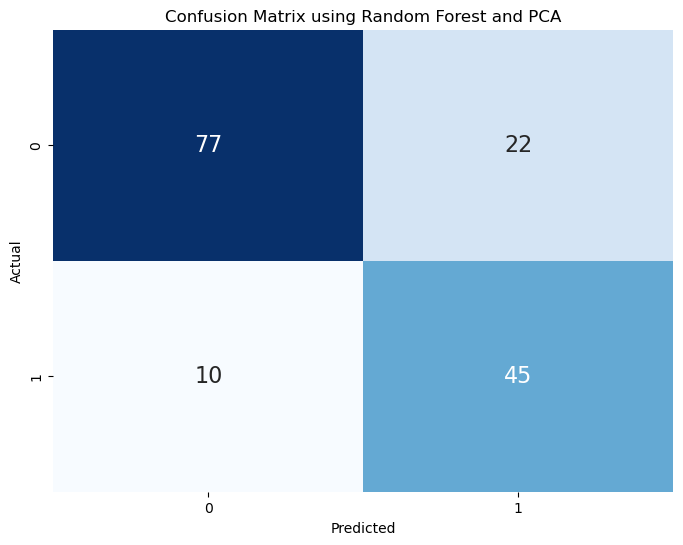

In [152]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix using Random Forest and PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [153]:
def random_forest_learn_curve(X, y, n_estimators, max_depth=None, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    n_estimators: The number of trees in the forest
    max_depth: The maximum depth of the tree. If None, nodes are expanded until all leaves are pure.
    n_components: Number of principal components for PCA. If None, PCA will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X = pca.fit_transform(X)
    
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=11)  # Random Forest model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    rf_pipeline = Pipeline(steps=[('scaler', sc), ('classifier', rf)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(rf_pipeline, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    rf_pipeline.fit(X, y)  # Fitting the model

    train_score = rf_pipeline.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=rf_pipeline, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Random Forest with PCA used

Cross Validation Accuracies:
-------------------------
[0.8831168831168831, 0.8376623376623377, 0.7987012987012987, 0.8366013071895425, 0.8366013071895425]

Mean Cross Validation Accuracy:
-------------------------
0.838536626771921

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.026767547229791723

Training Accuracy:
---------------
0.8385416666666666




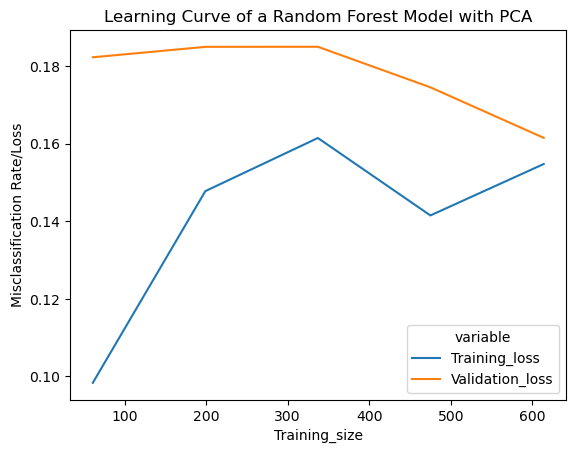

In [154]:
lc = random_forest_learn_curve(X,y,1,max_depth=3, n_components=3)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Random Forest Model with PCA")
plt.ylabel("Misclassification Rate/Loss");

## Building a Random Forest Model after applying t-SNE

### Standardize the data

In [155]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply t-SNE for dimensionality reduction

In [156]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

### Split the t-SNE-transformed data into training and testing sets

In [157]:
# Split the t-SNE-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

### Build Random Forest model

In [158]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

### Evaluate the model

In [159]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

### Displaying the Evaluation

In [160]:
# Print the accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report_rf)
# Calculate and display log loss
loss = log_loss(y_test, y_pred_rf)
print(f"\nLog Loss: {loss}")

Accuracy: 0.7597402597402597
Confusion Matrix:
 [[78 21]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154


Log Loss: 8.659838801281394


### Plot the confusion matrix

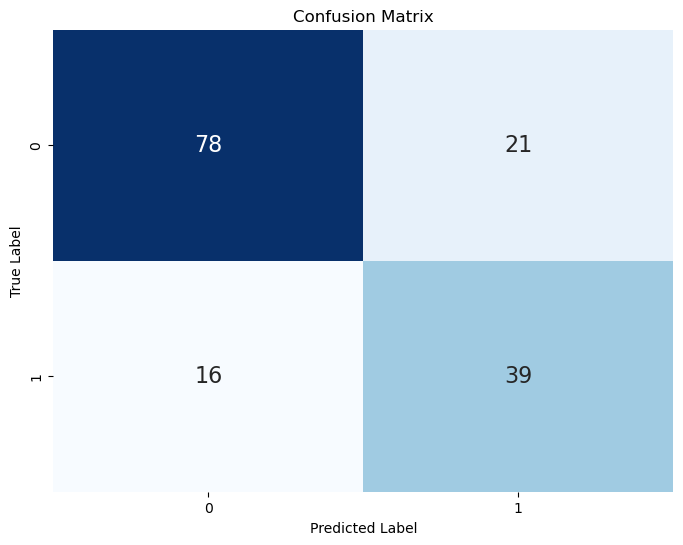

In [161]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [162]:
def rf_learn_curve_tsne(X, y, n_estimators, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    n_estimators: The number of trees in the forest
    n_components: Number of components for t-SNE. If None, t-SNE will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        tsne = TSNE(n_components=n_components)
        X = tsne.fit_transform(X)
    
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=11)  # Random Forest model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    rf_pipeline = Pipeline(steps=[('scaler', sc), ('classifier', rf)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(rf_pipeline, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    rf_pipeline.fit(X, y)  # Fitting the model

    train_score = rf_pipeline.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=rf_pipeline, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Random Forest with t-SNE used

Cross Validation Accuracies:
-------------------------
[0.8311688311688312, 0.8181818181818182, 0.8116883116883117, 0.8366013071895425, 0.8169934640522876]

Mean Cross Validation Accuracy:
-------------------------
0.8229267464561583

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.009369590942039546

Training Accuracy:
---------------
0.9166666666666666




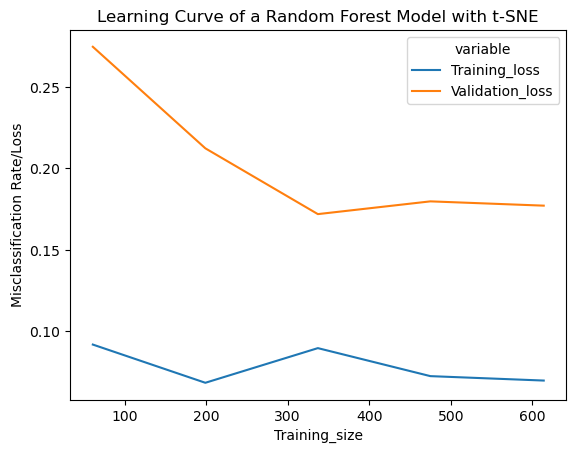

In [163]:
lc_tsne = rf_learn_curve_tsne(X,y,1,n_components=2)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_tsne["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_tsne["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_tsne["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_tsne["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Random Forest Model with t-SNE")
plt.ylabel("Misclassification Rate/Loss");

## Building a Random Forest Model after applying Multi Dimensional Scaling (MDS)

### Standardize the data

In [164]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply MDS for dimensionality reduction

In [165]:
# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

### Split the MDS-transformed data into training and testing sets

In [166]:
# Split the MDS-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_mds, y, test_size=0.2, random_state=42)

### Build Random Forest model

In [167]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

### Evaluate the model

In [168]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

### Displaying the Evaluation

In [169]:
# Print the accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report_rf)
# Calculate and display log loss
loss = log_loss(y_test, y_pred_rf)
print(f"\nLog Loss: {loss}")

Accuracy: 0.7012987012987013
Confusion Matrix:
 [[76 23]
 [23 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        99
           1       0.58      0.58      0.58        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154


Log Loss: 10.766286077268761


### Plot the confusion matrix

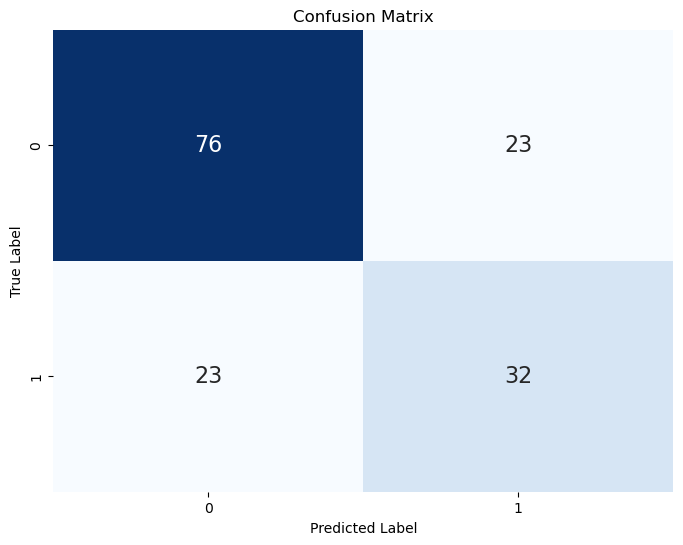

In [170]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [171]:
def rf_learn_curve_mds(X, y, n_estimators, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    n_estimators: The number of trees in the forest
    n_components: Number of components for MDS. If None, MDS will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        mds = MDS(n_components=n_components)
        X = mds.fit_transform(X)
    
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=11)  # Random Forest model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    rf_pipeline = Pipeline(steps=[('scaler', sc), ('classifier', rf)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(rf_pipeline, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    rf_pipeline.fit(X, y)  # Fitting the model

    train_score = rf_pipeline.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=rf_pipeline, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Random Forest with MDS used

Cross Validation Accuracies:
-------------------------
[0.7662337662337663, 0.8246753246753247, 0.7792207792207793, 0.8235294117647058, 0.803921568627451]

Mean Cross Validation Accuracy:
-------------------------
0.7995161701044052

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.02344631172885731

Training Accuracy:
---------------
0.8385416666666666




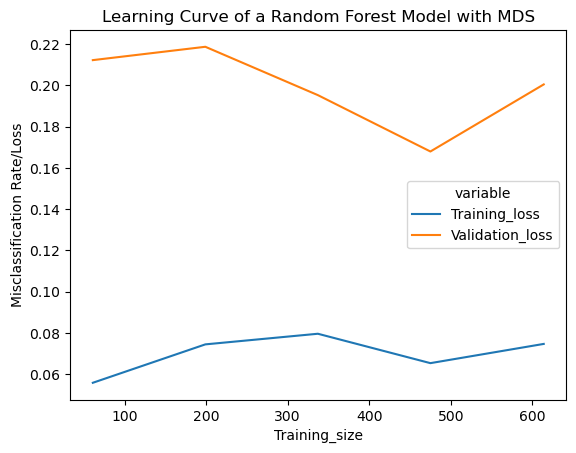

In [172]:
lc_rf = rf_learn_curve_mds(X,y,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_rf["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_rf["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_rf["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc_rf["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Random Forest Model with MDS")
plt.ylabel("Misclassification Rate/Loss");

## Building a Random Forest Model with no dimensionality reduction techniques

### Split the data into training and testing sets

In [173]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the features

In [174]:
# Standardizing the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

### Building and training the Random Forest model

In [175]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_standardized, y_train)

RandomForestClassifier(random_state=42)

In [176]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_standardized)

### Evaluate the model

In [177]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_str = classification_report(y_test, y_pred)

### Displaying the results

In [178]:
# Print the accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report_str)
# Calculate and display log loss
loss = log_loss(y_test, y_pred)
print(f"\nLog Loss: {loss}")

Accuracy: 0.8831168831168831
Confusion Matrix:
 [[88 11]
 [ 7 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.81      0.87      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154


Log Loss: 4.212894551974732


### Plot the confusion matrix

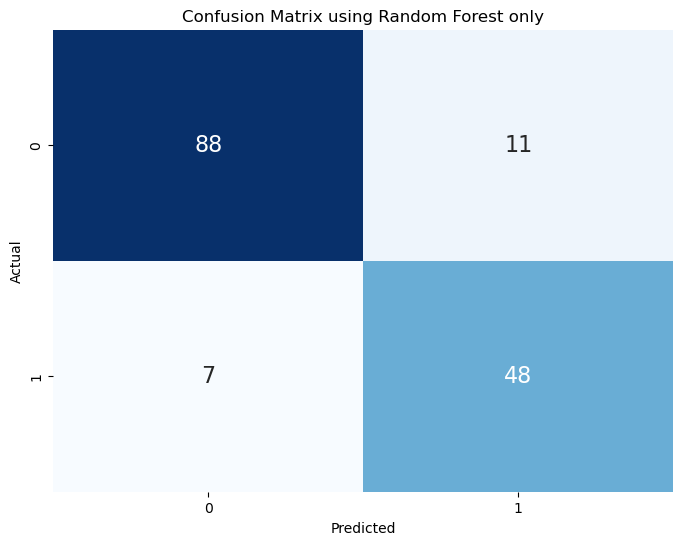

In [179]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix using Random Forest only")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### The Learning curve of a Random Forest with no dimensionality reduction technique used

Cross Validation Accuracies:
-------------------------
[0.8246753246753247, 0.7532467532467533, 0.7857142857142857, 0.8888888888888888, 0.8366013071895425]

Mean Cross Validation Accuracy:
-------------------------
0.8178253119429589

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.04615409166914938

Training Accuracy:
---------------
0.8580729166666666




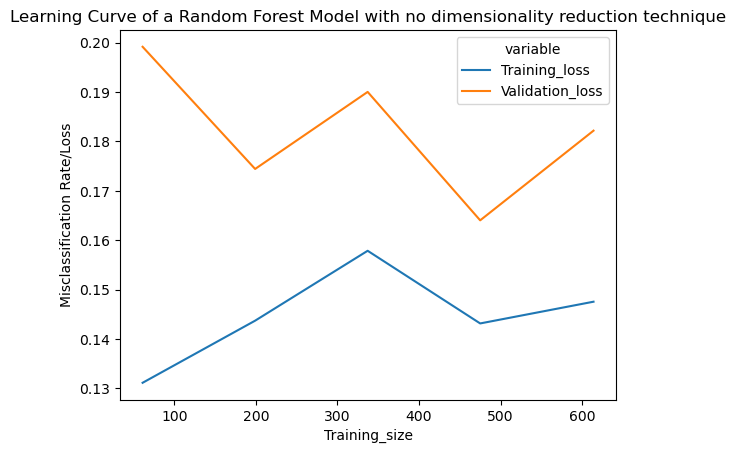

In [180]:
lc = random_forest_learn_curve(X,y,1,max_depth=3)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Random Forest Model with no dimensionality reduction technique")
plt.ylabel("Misclassification Rate/Loss");

## Building an Artificial Neural Network (ANN) Model after applying PCA

### Split the data into training and testing sets

In [181]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PC, y, test_size=0.2, random_state=42)

### Split the data into training and validation sets

In [182]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you can use X_train, y_train for actual training, and X_val, y_val for validation

### Build the Deep Artificial Neural Network (ANN) model with early stopping

In [183]:
# Build the Deep Artificial Neural Network (ANN) model with early stopping
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [184]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set up early stopping to prevent overfitting

In [185]:
# Set up early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Train the model with early stopping

In [186]:
# Train the model with early stopping
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/50
16/16 [==============================] - 1s 18ms/step - loss: 0.6438 - accuracy: 0.6253 - val_loss: 0.5927 - val_accuracy: 0.7642
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5736 - accuracy: 0.7026 - val_loss: 0.5270 - val_accuracy: 0.7317
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5365 - accuracy: 0.7271 - val_loss: 0.4892 - val_accuracy: 0.7480
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4988 - accuracy: 0.7413 - val_loss: 0.4661 - val_accuracy: 0.7642
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5018 - accuracy: 0.7454 - val_loss: 0.4499 - val_accuracy: 0.7724
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4989 - accuracy: 0.7332 - val_loss: 0.4384 - val_accuracy: 0.7967
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4778 - accuracy: 0.7515 - val_loss: 0.4335 - val_accuracy: 0.7967
Epoch 8/50
16/16 [=

### Make predictions

In [187]:
# Make predictions
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

5/5 [==============================] - 0s 4ms/step


### Evaluate the model

In [188]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report_ann = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report_ann)

# Calculate and display log loss
loss = log_loss(y_test, y_prob)
print(f"\nLog Loss: {loss}")

5/5 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.7922
Test Loss: 0.4458, Test Accuracy: 0.7922
Confusion Matrix:
[[80 19]
 [13 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        99
           1       0.69      0.76      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.80      0.79      0.79       154


Log Loss: 0.44581344854364696


### Plot the log loss curve

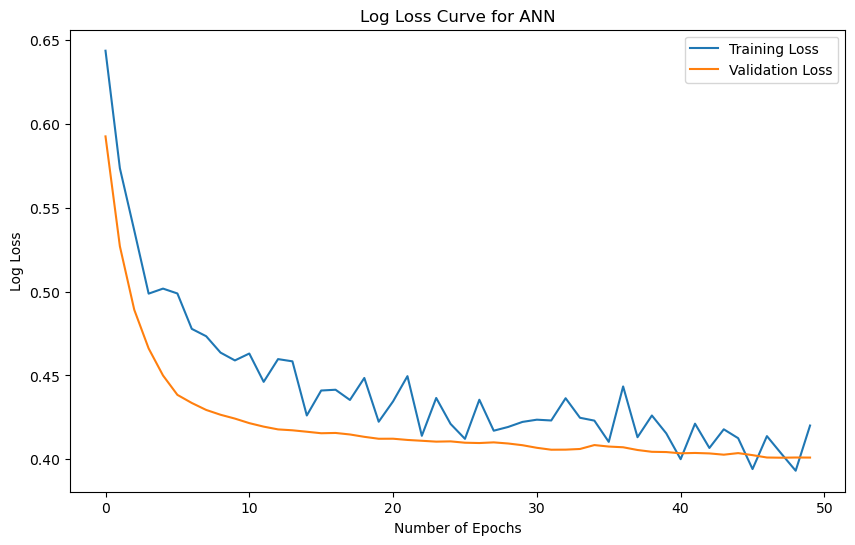

In [189]:
# Plot the log loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Log Loss Curve for ANN')
plt.xlabel('Number of Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

## Building an Artificial Neural Network (ANN) Model after applying t-SNE

### Standardize the features

In [190]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply t-SNE for dimensionality reduction

In [191]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

### Split the data into training and testing sets

In [192]:
# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tsne, y, test_size=0.4, random_state=42)

# Now you can use X_train, y_train for actual training, and X_val, y_val for validation

### Split the data into training and validation sets

In [193]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Build the Deep Artificial Neural Network (ANN) model with early stopping

In [194]:
# Build the Deep Artificial Neural Network (ANN) model with early stopping
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [195]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set up early stopping to prevent overfitting

In [196]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Train the model with early stopping

In [197]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 1.4535 - accuracy: 0.5783 - val_loss: 0.5889 - val_accuracy: 0.6429
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.9527 - accuracy: 0.6674 - val_loss: 0.6920 - val_accuracy: 0.6753
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8629 - accuracy: 0.6957 - val_loss: 0.6965 - val_accuracy: 0.6948
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 0.8657 - accuracy: 0.6804 - val_loss: 0.6375 - val_accuracy: 0.7208
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 0.8535 - accuracy: 0.6826 - val_loss: 0.5974 - val_accuracy: 0.7208
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 0.8214 - accuracy: 0.6696 - val_loss: 0.5723 - val_accuracy: 0.7532
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 0.7964 - accuracy: 0.6870 - val_loss: 0.5662 - val_accuracy: 0.7468
Epoch 8/

### Make predictions

In [198]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


### Evaluate the model

In [199]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report_ann = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(class_report_ann)

# Calculate and display log loss
loss = log_loss(y_test, y_pred)
print(f"\nLog Loss: {loss}")

5/5 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7338
Test Loss: 0.5089, Test Accuracy: 0.7338
Confusion Matrix:
[[78 24]
 [17 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       102
           1       0.59      0.67      0.63        52

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154


Log Loss: 0.5088860975228575


### Plot the log loss curve

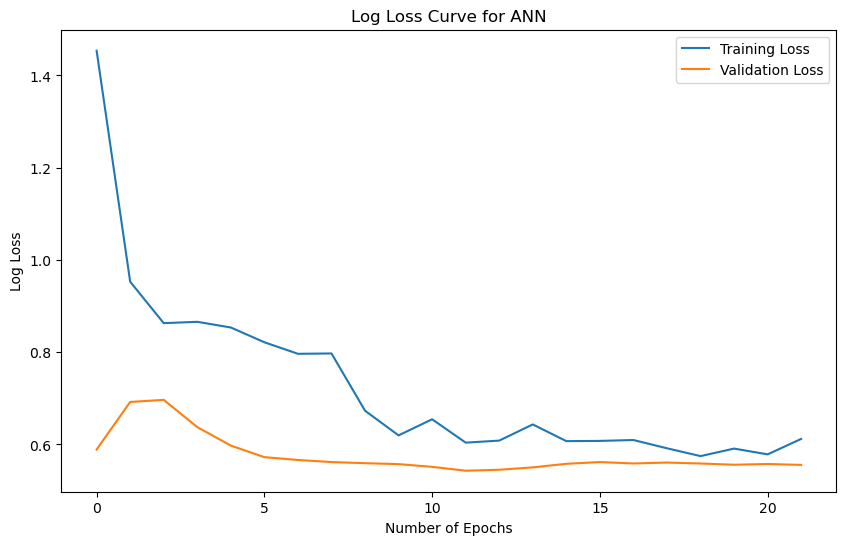

In [200]:
# Plot the log loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Log Loss Curve for ANN')
plt.xlabel('Number of Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

## Building an Artificial Neural Network (ANN) Model after applying MDS

### Standardize the features

In [201]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply MDS for dimensionality reduction

In [202]:
# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_standardized)

### Split the data into training and testing sets

In [203]:
# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_mds, y, test_size=0.4, random_state=42)

# Now you can use X_train, y_train for actual training, and X_val, y_val for validation

### Split the data into training and validation sets

In [204]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Build the Deep Artificial Neural Network (ANN) model with early stopping

In [205]:
# Build the Deep Artificial Neural Network (ANN) model with early stopping
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [206]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set up early stopping to prevent overfitting

In [207]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Train the model with early stopping

In [208]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.6839 - accuracy: 0.5587 - val_loss: 0.6206 - val_accuracy: 0.7468
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6167 - accuracy: 0.6739 - val_loss: 0.5595 - val_accuracy: 0.7532
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5577 - accuracy: 0.7283 - val_loss: 0.5300 - val_accuracy: 0.7597
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5333 - accuracy: 0.7413 - val_loss: 0.5114 - val_accuracy: 0.7532
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 0.5463 - accuracy: 0.7478 - val_loss: 0.5014 - val_accuracy: 0.7532
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5271 - accuracy: 0.7652 - val_loss: 0.4935 - val_accuracy: 0.7532
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4971 - accuracy: 0.7630 - val_loss: 0.4895 - val_accuracy: 0.7597
Epoch 8/10

### Make predictions

In [209]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


### Evaluate the model

In [210]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report_ann = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(class_report_ann)

# Calculate and display log loss
loss = log_loss(y_test, y_pred)
print(f"\nLog Loss: {loss}")

5/5 [==============================] - 0s 5ms/step - loss: 0.4616 - accuracy: 0.7662
Test Loss: 0.4616, Test Accuracy: 0.7662
Confusion Matrix:
[[84 18]
 [18 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       102
           1       0.65      0.65      0.65        52

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154


Log Loss: 0.4615609953280216


### Plot the log loss curve

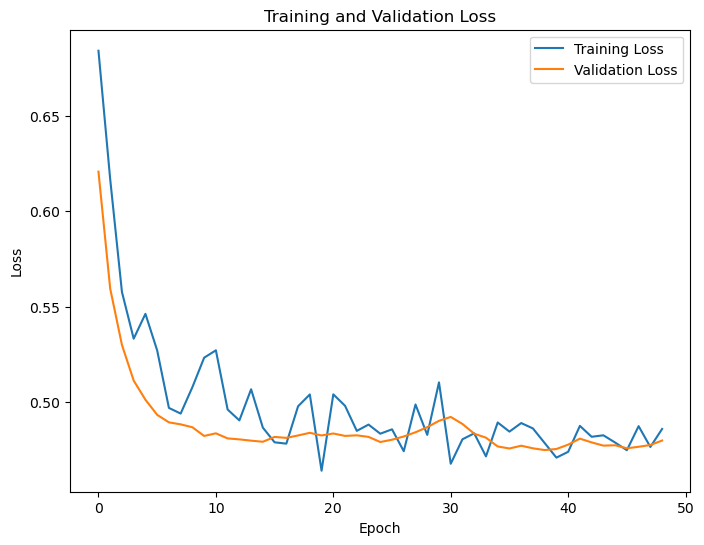

In [211]:
# Plot the log loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Building an Artificial Neural Network (ANN) Model with no dimensionality reduction techniques

### Split the data into training and test sets

In [212]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the data

In [213]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Split the training data into training and validation sets

In [214]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Build the Artificial Neural Network (ANN) model

In [215]:
# Build the Artificial Neural Network (ANN) model
#model = Sequential()
#model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1, activation='linear'))

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [216]:
# Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set up early stopping to prevent overfitting

In [217]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True)

### Train the model

In [218]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/100
16/16 [==============================] - 1s 20ms/step - loss: 0.7883 - accuracy: 0.5010 - val_loss: 0.6300 - val_accuracy: 0.6992
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6738 - accuracy: 0.5743 - val_loss: 0.5666 - val_accuracy: 0.7967
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 0.6133 - accuracy: 0.6762 - val_loss: 0.5280 - val_accuracy: 0.8049
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5596 - accuracy: 0.7108 - val_loss: 0.4984 - val_accuracy: 0.7967
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5641 - accuracy: 0.7251 - val_loss: 0.4786 - val_accuracy: 0.7967
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5316 - accuracy: 0.7413 - val_loss: 0.4647 - val_accuracy: 0.7967
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5128 - accuracy: 0.7373 - val_loss: 0.4520 - val_accuracy: 0.8049
Epoch 8/10

Epoch 59/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3328 - accuracy: 0.8574 - val_loss: 0.3760 - val_accuracy: 0.8537
Epoch 60/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3285 - accuracy: 0.8635 - val_loss: 0.3756 - val_accuracy: 0.8455
Epoch 61/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3553 - accuracy: 0.8656 - val_loss: 0.3780 - val_accuracy: 0.8455
Epoch 62/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3147 - accuracy: 0.8758 - val_loss: 0.3787 - val_accuracy: 0.8374
Epoch 63/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3345 - accuracy: 0.8778 - val_loss: 0.3805 - val_accuracy: 0.8374
Epoch 64/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3235 - accuracy: 0.8798 - val_loss: 0.3842 - val_accuracy: 0.8374
Epoch 65/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3468 - accuracy: 0.8391 - val_loss: 0.3862 - val_accuracy: 0.8293
Epoch 

### Evaluate the model

In [219]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 5ms/step


### Evaluate the model on the test set

In [220]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Calculate and display confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Calculate and display log loss
loss = log_loss(y_test, y_pred)
print(f"\nLog Loss: {loss}")

5/5 [==============================] - 0s 5ms/step - loss: 0.4203 - accuracy: 0.8247
Test Loss: 0.4203, Test Accuracy: 0.8247
Confusion Matrix:
[[84 15]
 [12 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        99
           1       0.74      0.78      0.76        55

    accuracy                           0.82       154
   macro avg       0.81      0.82      0.81       154
weighted avg       0.83      0.82      0.83       154


Log Loss: 0.4203475768290523


### Plot the training history

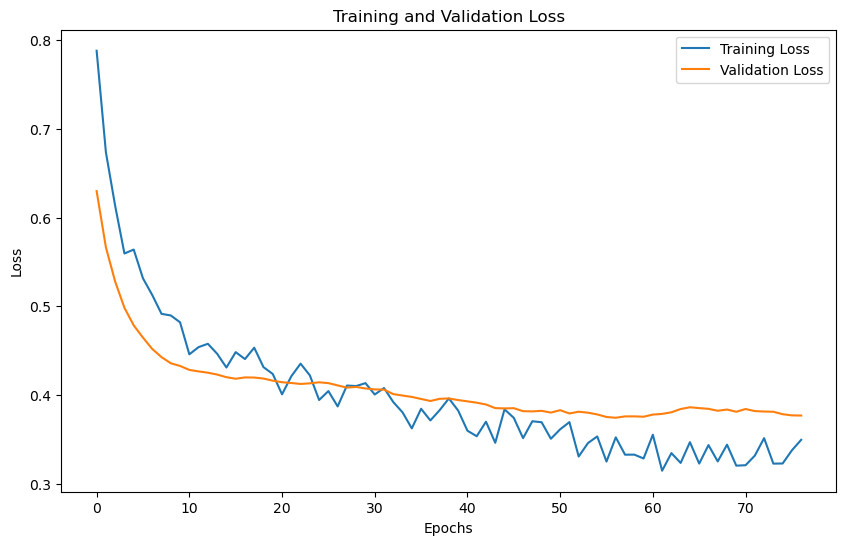

In [221]:
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()